## Хід виконання роботи

##### Практична робота №2 

1) Відповідно до вашого варіанту опишіть можливі три бізнес-цілі, цілі моделювання та критерії успіху до них відповідно. Для цього завдання візьміть до уваги лише пункт «Ваш клієнт».

2) Ознайомившись із пунктом «Запит клієнта» додайте до попередніх цілей задану та сформулюйте цілі моделювання і критерії успіху.

3) Проведіть аналіз даних вашого підприємства (файл «train.csv») та сформуйте звіт про дослідження даних та звіт про якість даних.
Приклади функцій, що використовуються для аналізу даних ви можете знайти у файлі example.ipynb Для проведення аналізу необхідно встановити python3 та jupyter notebook (послідовність дій вказана у файлі Встановлення python)

4) Наведіть приклади цікавих, на вашу думку, фактів з аналізу даних.


## Індивідуальне завдання

##### 6 варіант https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task

Опис Компанії-Замовника: HSBC Holdings plc: Міжнародний банківський конгломерат, який активно використовує цифровий маркетинг та персоналізовані кампанії для просування своїх продуктів.

Запит: Банк шукає способи для підвищення результативності своїх маркетингових кампаній, зокрема в контексті залучення клієнтів до нових банківських продуктів.

Пропозиція Реалізації: Розробка класифікаційної моделі машинного навчання для прогнозування реакції потенційних клієнтів на різні маркетингові ініціативи. Вона повинна оцінювати ефективність різних підходів, враховуючи демографічні дані клієнтів, їхню історію взаємодій з банком, а також відгуки на попередні рекламні акції. Це допоможе банку більш цілеспрямовано підходити до своїх клієнтів, збільшуючи ефективність маркетингових заходів та залучення нових клієнтів.

Додаю всі бібліотеки, які будуть застосовуватися

In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.imputation import mice
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# for Q-Q plots
import scipy.stats as stats

In [2]:
ds = pd.read_csv("D:\\3Kurs\\1Sem\\SS\\DataSet\\variant_6.csv")
ds.head()
# ds.nunique()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1.0,-1,0.0,unknown,no
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1.0,339,4.0,failure,no
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1.0,330,1.0,failure,no
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4.0,-1,0.0,unknown,no
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1.0,-1,0.0,unknown,no


### Кількість пропущенних значень в кожній колонці 

In [3]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)
        r+=1

print("\nВ скількох колонках пропущенні значення: ", r)

Unnamed: 0 452
age 316
job 113
marital 113
education 530
default 316
housing 452
loan 226
contact 113
duration 552
campaign 113
previous 113
y 226

В скількох колонках пропущенні значення:  13


In [4]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nВ скількох колонках пропущенні значення: ", r)
# ds.shape[0]

Unnamed: 0 452 	 10.0 %
age 316 	 6.99 %
job 113 	 2.5 %
marital 113 	 2.5 %
education 530 	 11.72 %
default 316 	 6.99 %
housing 452 	 10.0 %
loan 226 	 5.0 %
contact 113 	 2.5 %
duration 552 	 12.21 %
campaign 113 	 2.5 %
previous 113 	 2.5 %
y 226 	 5.0 %

В скількох колонках пропущенні значення:  13


### Спочатку я досліджу дані на навність аномалій

In [5]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [6]:
print('Колонки: ',list(ds.columns), '\n')

Колонки:  ['Unnamed: 0.1', 'Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'] 



In [7]:
ds.shape[0]

4521

### Для початку досліджу колонку "age" на аномалії

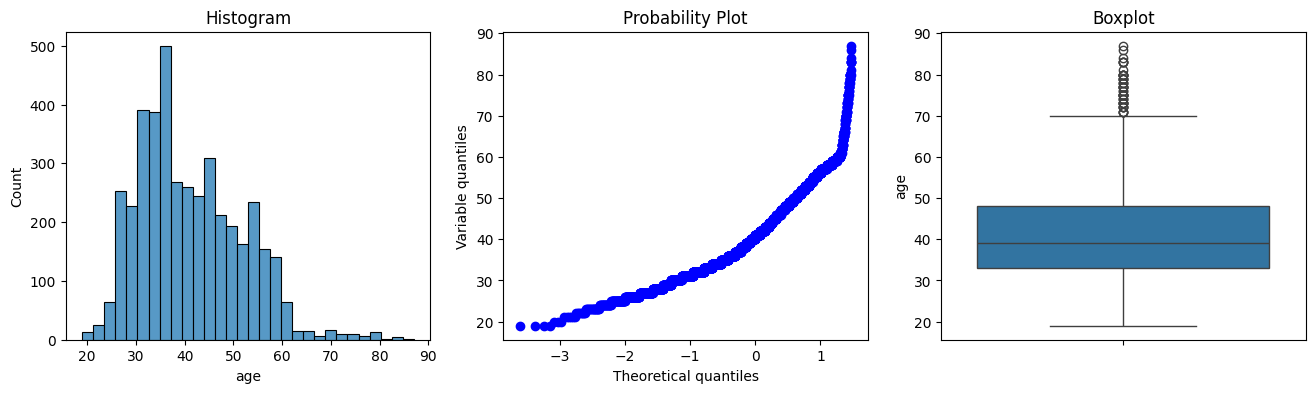

In [8]:
diagnostic_plots(ds, 'age')

In [9]:
print(ds.shape[0], "\t", round((ds[ds["age"] >= 70]["age"].count() * 100) / ds.shape[0], 2), "%")


4521 	 1.26 %


З графіків видно, що спочатку нормальний розподіл але після 70 він виглядає аномальними. Також я перевірили скільки відсотків таких аномальних даних. Так к їх не велика кількість і ймовірніше за все це не аномалії, адже можуть бути так клієнти з таким віком, то цю колонку я вирішила не міняти

### Дослідження на аномалії стовпчика "balance"

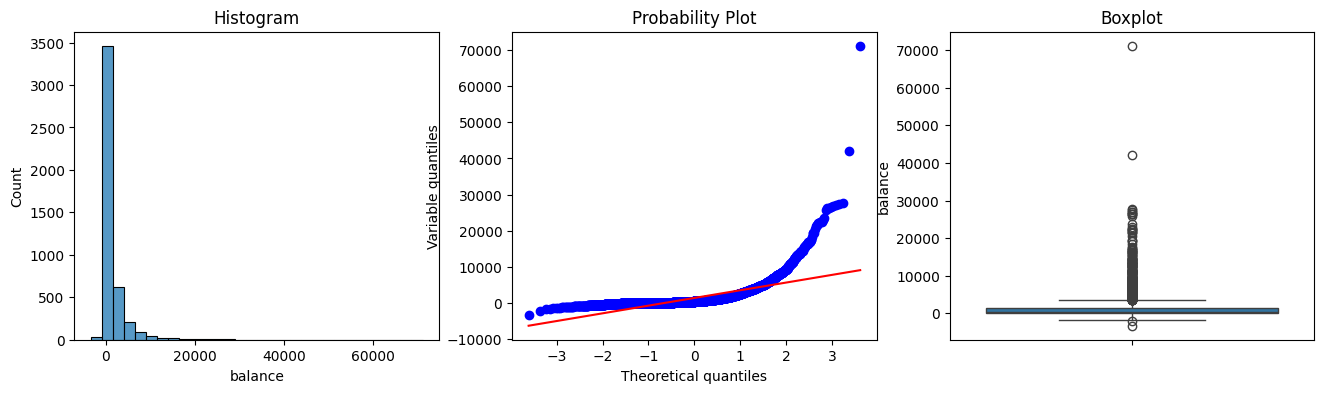

In [10]:
diagnostic_plots(ds, 'balance')

Дивлячись на графіки на початку дані виглядають нормально, але пізніше видно, що вони аномально великі, через що модель може перетренуватися. Тому для їх вирішення я застосую один із методів наприклад IQR.

In [11]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [12]:
balance_upper_boundary, balance_lower_boundary = find_skewed_boundaries(ds, "balance", 4.99)

print (balance_upper_boundary, balance_lower_boundary)
print(ds.shape[0], "\t", round((ds[ds["balance"] >= balance_upper_boundary]["balance"].count() * 100) / ds.shape[0], 2), "%")


8520.89 -6971.89
4521 	 2.76 %


In [13]:
ds.loc[(ds["balance"]>balance_upper_boundary)|(ds["balance"]<balance_lower_boundary)]

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10,10,10.0,39.0,services,married,secondary,no,9374,yes,no,unknown,20,may,273.0,1.0,-1,0.0,unknown,no
40,40,NaN,38.0,management,single,tertiary,no,11971,NaN,no,unknown,17,nov,NaN,2.0,101,3.0,failure,no
64,64,64.0,56.0,admin.,married,secondary,no,16873,no,no,cellular,7,oct,223.0,1.0,-1,0.0,unknown,no
94,94,94.0,57.0,blue-collar,NaN,secondary,no,14093,no,no,cellular,11,aug,NaN,NaN,-1,0.0,unknown,no
174,174,174.0,42.0,management,married,tertiary,no,9009,no,no,cellular,20,nov,135.0,2.0,-1,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,4363,4363.0,38.0,blue-collar,single,secondary,no,13156,yes,no,cellular,17,apr,291.0,4.0,331,1.0,failure,no
4369,4369,4369.0,57.0,technician,married,secondary,no,16063,yes,no,unknown,30,may,352.0,3.0,-1,0.0,unknown,no
4394,4394,4394.0,43.0,blue-collar,married,secondary,no,10910,yes,no,cellular,15,may,66.0,2.0,-1,0.0,unknown,no
4440,4440,4440.0,45.0,blue-collar,married,primary,no,13117,no,no,unknown,11,jun,42.0,2.0,-1,0.0,unknown,no


In [14]:
outliers_balance = np.where(ds['balance'] > balance_upper_boundary, True,
                       np.where(ds['balance'] < -2000, True, False))

In [15]:
# let's trimm the dataset

ds_trimmed = ds.loc[~outliers_balance, ]

ds.shape, ds_trimmed.shape, 


((4521, 19), (4394, 19))

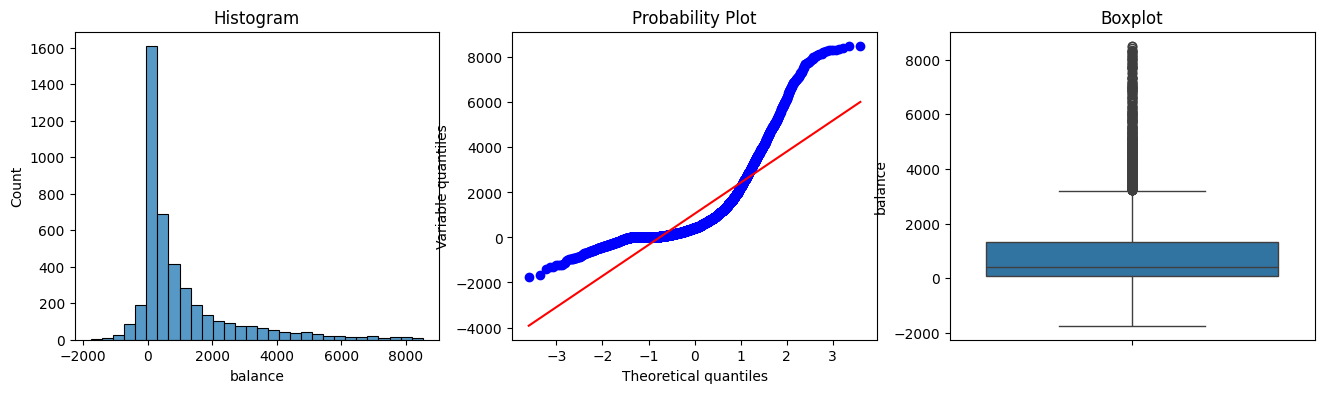

In [16]:
diagnostic_plots(ds_trimmed, 'balance')

Дані є оновленими і очединих аномалій немає

### Дослідження на аномалії стовпчика "day"

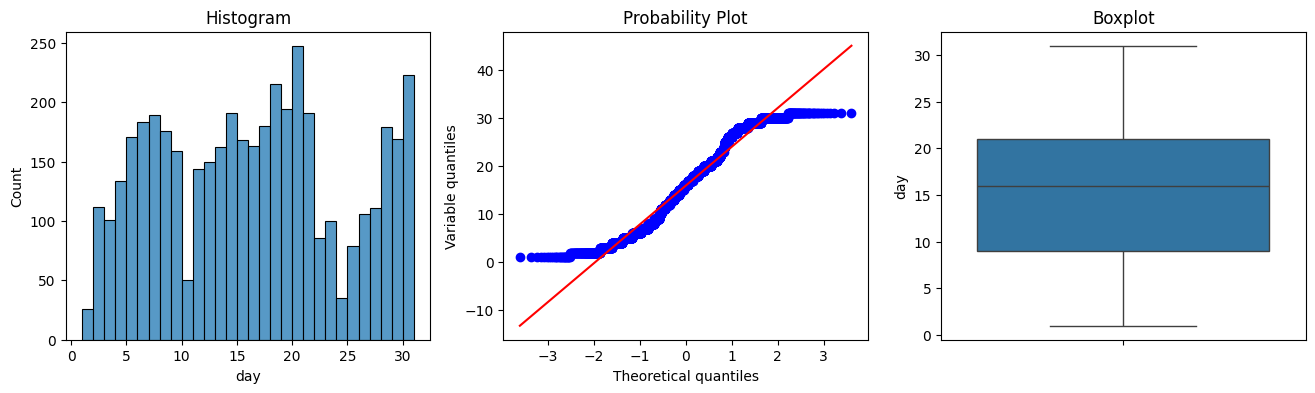

In [17]:
diagnostic_plots(ds_trimmed, 'day')

Дивлячись на графіки стовпчик "day" є не аномальним

### Дослідження на аномалії стовпчика "duration"

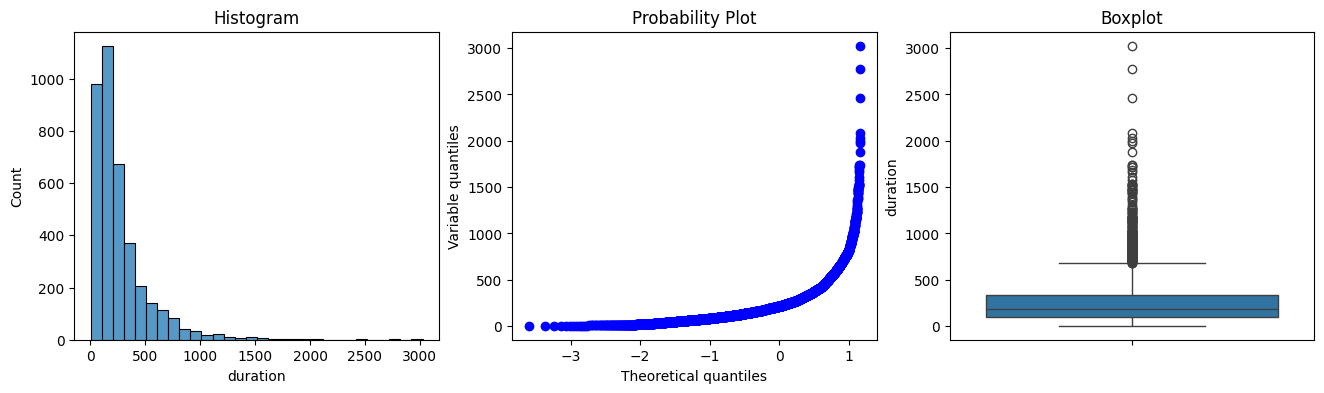

In [18]:
diagnostic_plots(ds_trimmed, 'duration')

Дивлячись на діанрами до колонки "duratoin" видно, що пристуні аномалії, тому для їх вирішення, я скористаюся тим самим методом, що і для стовпчика "balance".

In [19]:
duration_upper_boundary, duration_lower_boundary = find_skewed_boundaries(ds_trimmed, "duration", 4)

print (duration_upper_boundary, duration_lower_boundary)
print(ds_trimmed.shape[0], "\t", round((ds_trimmed[ds_trimmed["duration"] >= duration_upper_boundary]["duration"].count() * 100) / ds_trimmed.shape[0], 2), "%")

1259.0 -820.0
4394 	 1.0 %


In [20]:
outliers_duration = np.where(ds_trimmed['duration'] > duration_upper_boundary, True,
                       np.where(ds_trimmed['duration'] < duration_lower_boundary, True, False))

In [21]:
# let's trimm the dataset
ds_trimmed = ds_trimmed.loc[~outliers_duration, ]

ds.shape, ds_trimmed.shape, 

((4521, 19), (4352, 19))

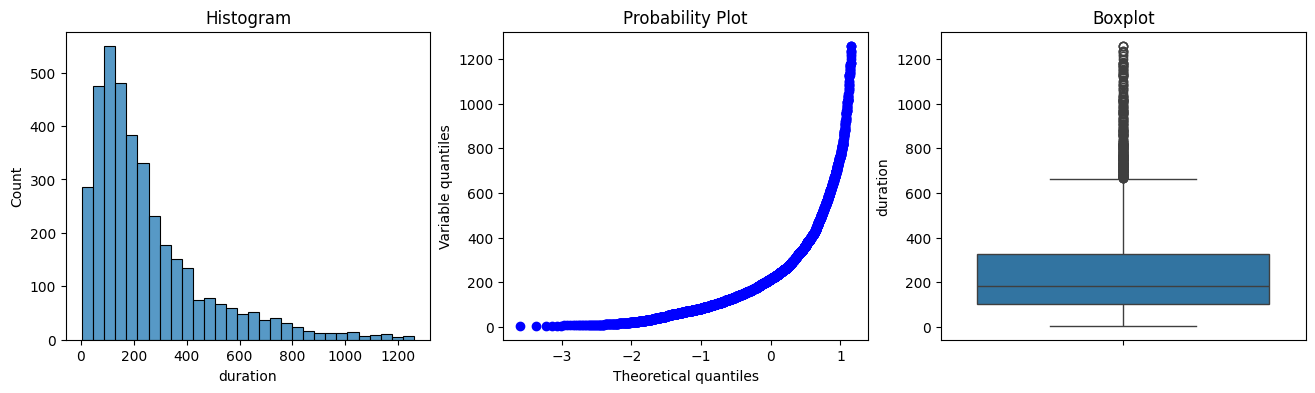

In [22]:
diagnostic_plots(ds_trimmed, 'duration')

Тепер дивлячись на графіки, дані виглядають не аномальнии

### Дослідження на аномалії стовпчика "camping"

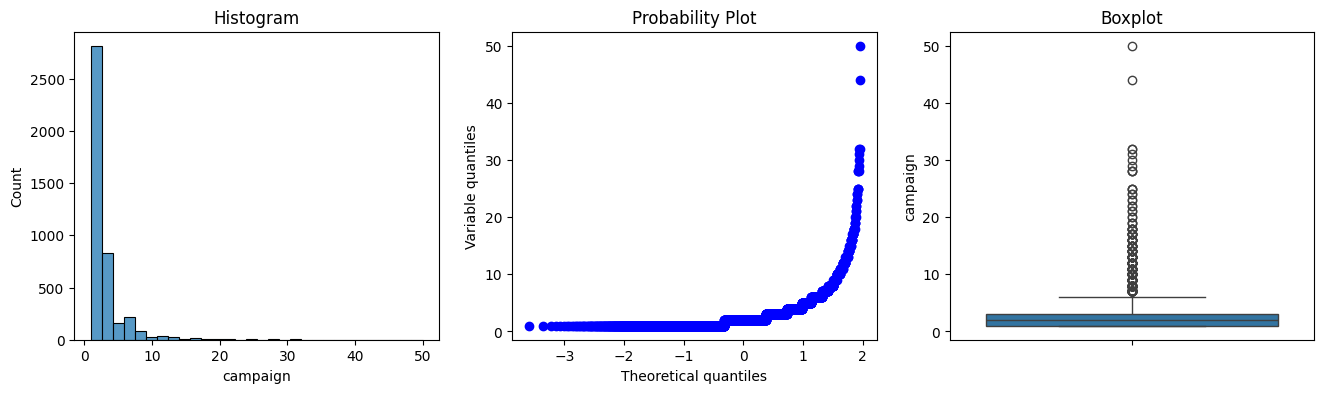

In [23]:
diagnostic_plots(ds_trimmed, 'campaign')

На графіках видно, що присутні аномалії в колонці "campaign", для їх вирішення я скористаюся тим самим методом що і в попередніх колонках

In [24]:
campaign_upper_boundary, campaign_lower_boundary = 25,1

print (campaign_upper_boundary, campaign_lower_boundary)
print(ds_trimmed.shape[0], "\t", round((ds_trimmed[ds_trimmed["campaign"] >= campaign_upper_boundary]["campaign"].count() * 100) / ds_trimmed.shape[0], 2), "%")

25 1
4352 	 0.3 %


In [25]:
ds_trimmed.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4352.000000,3912.000000,4041.000000,4352.000000,4352.000000,3816.000000,4243.000000,4352.000000,4244.000000
mean,2259.980928,2266.927658,41.105172,1051.121324,15.929917,252.842505,2.794014,39.689338,0.543120
std,1301.451556,1303.021589,10.536996,1609.578320,8.262995,219.692300,3.108367,100.340535,1.714553
min,0.000000,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1139.750000,1149.750000,33.000000,62.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2256.500000,2261.000000,39.000000,422.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3387.250000,3403.250000,48.000000,1325.500000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,4520.000000,4520.000000,87.000000,8515.000000,31.000000,1259.000000,50.000000,871.000000,25.000000


In [26]:

ds_trimmed['campaign'] = np.where(ds_trimmed['campaign'] > campaign_upper_boundary, campaign_upper_boundary, ds_trimmed['campaign'])


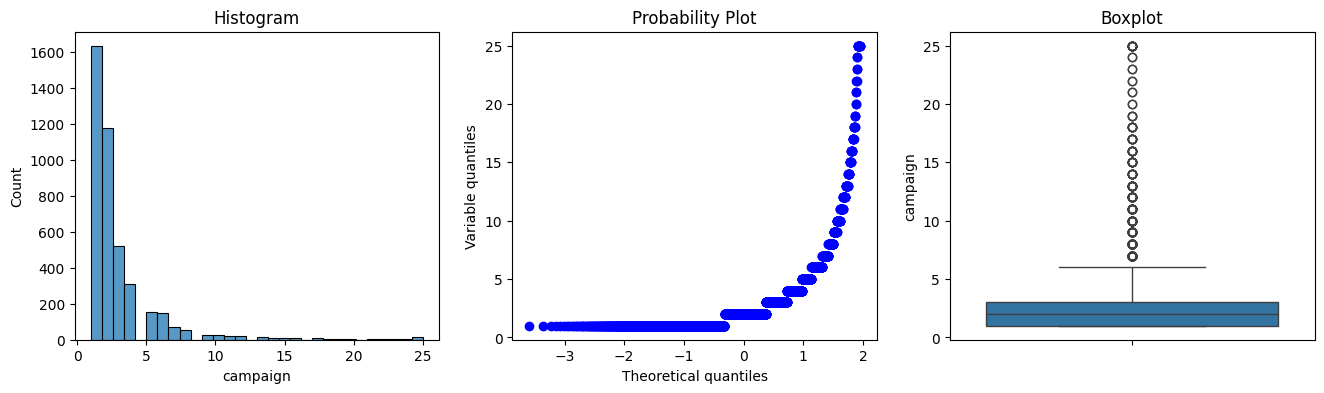

In [27]:
diagnostic_plots(ds_trimmed, 'campaign')

Дані виглядають нормалізовано

### Дослідження на аномалії стовпчика "pdays"

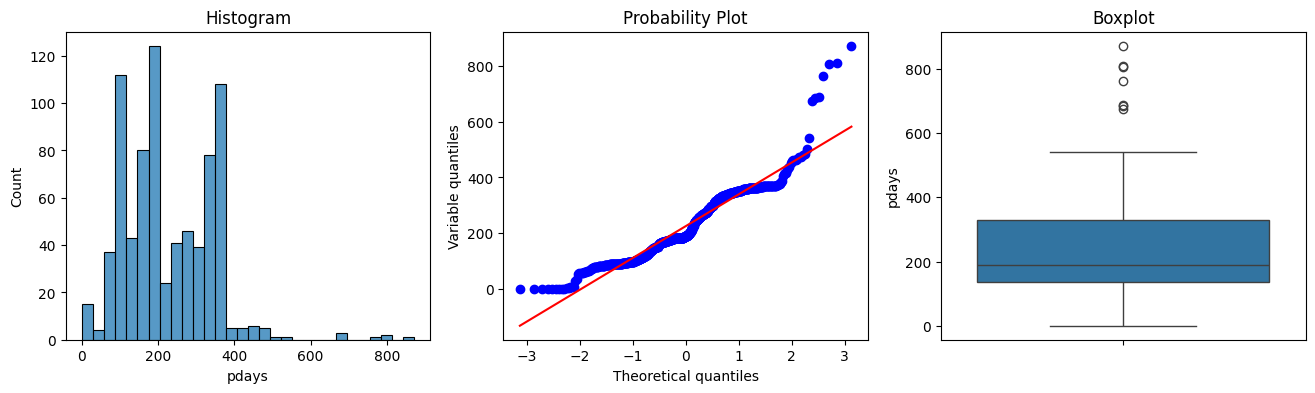

In [28]:
filtered_data = ds_trimmed[ds_trimmed['pdays'] > 0]
diagnostic_plots(filtered_data, 'pdays')


Застосовую той же самий метод, що  для попередніх колонок

In [29]:
pdays_upper_boundary, pdays_lower_boundary = find_skewed_boundaries(filtered_data, "pdays", 3)

print (pdays_upper_boundary, pdays_lower_boundary)
print(ds_trimmed.shape[0], "\t", round((ds_trimmed[ds_trimmed["pdays"] >= pdays_upper_boundary]["pdays"].count() * 100) / ds_trimmed.shape[0], 2), "%")

912.0 -446.0
4352 	 0.0 %


In [30]:
outliers_pdays = np.where(ds_trimmed['pdays'] > 600, True,
                       np.where(ds_trimmed['pdays'] < pdays_lower_boundary, True, False))

In [31]:
# let's trimm the dataset
ds_trimmed = ds_trimmed.loc[~outliers_pdays, ]

ds.shape, ds_trimmed.shape, 

((4521, 19), (4345, 19))

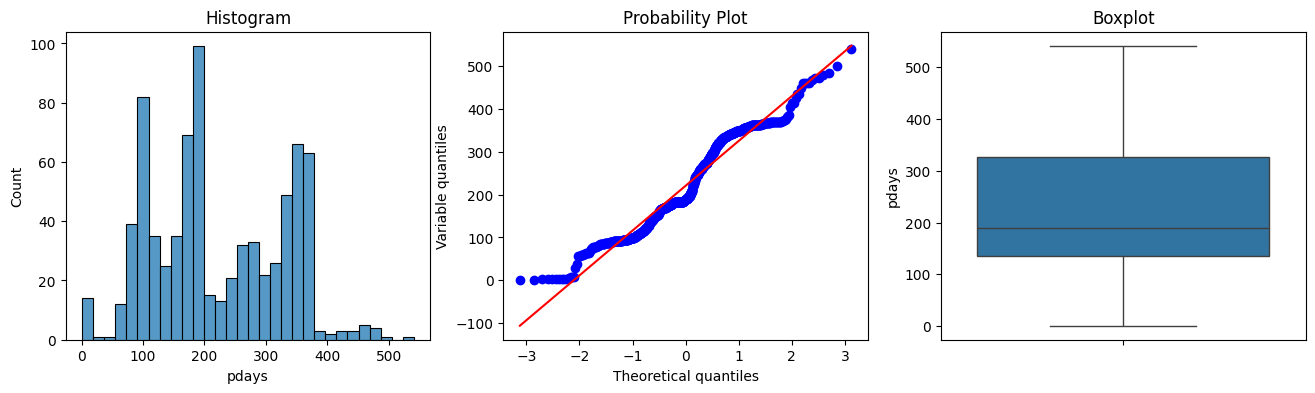

In [32]:
diagnostic_plots(ds_trimmed[ds_trimmed['pdays'] > 0], 'pdays')

Дані виглядають нормалізовано

### Дослідження на аномалії стовпчика "previous"

In [33]:
ds_trimmed.shape

(4345, 19)

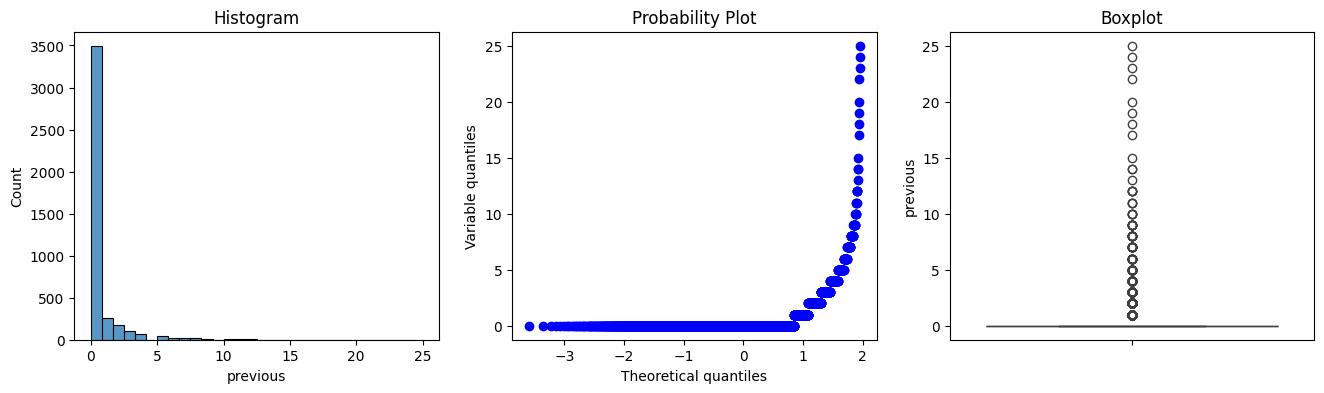

In [34]:
diagnostic_plots(ds_trimmed, 'previous')

дані хоть і виглядають аномальними, направді вони нормальні, адже такі дані є можливими враховуючи значення стовпчика

In [35]:
missing_rows = ds_trimmed[ds_trimmed.isnull().sum(axis=1) >= 5]

print(missing_rows.shape[0],'\n')
print(ds_trimmed.shape[0])
print("Відсоток рядочків, які мають більше-рівне 5 пропущених значень",round((missing_rows.shape[0]*100)/ds_trimmed.shape[0],3),"%\n")


121 

4345
Відсоток рядочків, які мають більше-рівне 5 пропущених значень 2.785 %



Так як у цих 121 рядках відсутні більше 5 значень в різних колонках, на мою думку їх можна видалити, адже при спробі їх замінити іншими буде викревлення самої  моделі, також відсоток цих рядків менше тьох відсотків, тому відсутність цих даних не сильно повпливає на саму розроблену тренувальну модель.

In [36]:
ds_cleaned = ds_trimmed.drop(missing_rows.index)

r = 0
missing = list()
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nВ скількох колонках пропущенні значення: ", r)

Unnamed: 0 361 	 8.55 %
age 256 	 6.06 %
job 79 	 1.87 %
marital 76 	 1.8 %
education 424 	 10.04 %
default 256 	 6.06 %
housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
duration 437 	 10.35 %
campaign 76 	 1.8 %
previous 79 	 1.87 %
y 168 	 3.98 %

В скількох колонках пропущенні значення:  13


In [37]:
ds_trimmed.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4345.000000,3907.000000,4034.000000,4345.000000,4345.000000,3812.000000,4237.000000,4345.000000,4237.000000
mean,2259.268124,2266.468134,41.096678,1050.773763,15.937399,252.753935,2.776729,38.536249,0.537409
std,1301.492204,1302.850040,10.537528,1609.931002,8.262261,219.526052,2.920847,96.174542,1.703695
min,0.000000,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1139.000000,1149.500000,33.000000,62.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2256.000000,2262.000000,39.000000,422.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3387.000000,3402.500000,48.000000,1325.000000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,4520.000000,4520.000000,87.000000,8515.000000,31.000000,1259.000000,25.000000,541.000000,25.000000


In [38]:
ds_cleaned.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4224.000000,3863.000000,3968.000000,4224.000000,4224.000000,3787.000000,4148.000000,4224.000000,4145.000000
mean,2264.161458,2267.837691,41.084677,1051.143229,15.943419,252.758384,2.782064,38.321970,0.537756
std,1302.925964,1302.772854,10.532454,1611.726843,8.264733,219.573889,2.942704,95.852633,1.709497
min,0.000000,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1139.750000,1149.500000,33.000000,62.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.500000,2262.000000,39.000000,422.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3397.250000,3405.500000,48.000000,1323.500000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,4520.000000,4520.000000,87.000000,8515.000000,31.000000,1259.000000,25.000000,541.000000,25.000000


Як бачимо кількість пропущених значень в сповпчиках зменшилася та початкові значення мало, що змінилися, що означає,що це є початковим кроком до підготовки даних.


### Аналіз колонок, в яких пропущенні значення:

1) Unnamed - 375 - 8.52 % (числовиий стовпчик, його можна буде видалити, адже вона ні на що не впливає)

2) age - 261 - 5.93 % (числовиий стовпчик)

3) job -  84 - 1.91 % 

4) marital - 81 - 1.84 % 

5) education - 436 - 9.91 %

6) default - 261 - 5.93 %

8) housing - 375 - 8.52 %

9) loan - 175 - 3.98 %

10) contact - 84 - 1.91 %

13) duration - 456 - 10.36 % (числовиий стовпчик)

14) campaign - 81 - 1.84 % (числовиий стовпчик)

16) previous - 84 - 1.91 % (числовиий стовпчик)

18) у - 175 - 3.98 %

### Спочатку попрацюю зі всіма числовими стовпчикаки, почну з "age":

<Axes: >

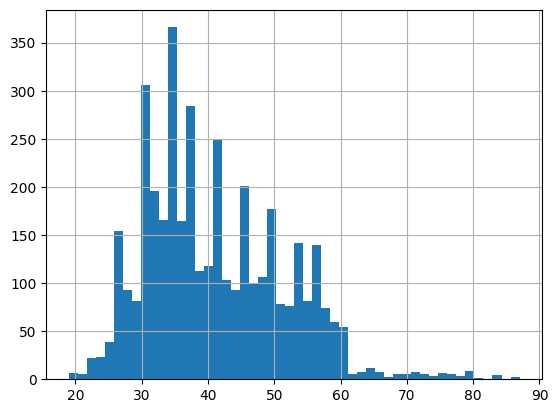

In [39]:
ds_cleaned[ds_cleaned['age']<100]['age'].hist(bins=50)

In [40]:
ds_claster = ds_cleaned.copy()
features = ds_claster.select_dtypes(include=np.number).fillna(0)

kmeans = KMeans(n_clusters=3)

In [41]:

ds_claster['age_missing'] = ds_claster['age'].isnull().astype(int)
ds_claster['cluster_age'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_age')['age_missing'].mean())


cluster_age
0    0.061307
1    0.059490
2    0.061834
Name: age_missing, dtype: float64


Для дослідження на випадковість відсутніх значень я скористалася методом кластеризації і при 3 кластерах різниця не велика, це означає, що дані відсутні випадково в іншому випадку ні.

В стовпчику "age" видно, що дані відсутні випадково, тому можна застосувати метод заміна середнім/медіаним значенням або замінити відсутне значення довільним. Я застосую метод заміни медіаним значеням.


In [42]:
ds_claster.head()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,y,age_missing,cluster_age
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,...,19,oct,79.0,1.0,-1,0.0,unknown,no,0,0
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,...,11,may,220.0,1.0,339,4.0,failure,no,0,2
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,...,16,apr,185.0,1.0,330,1.0,failure,no,0,0
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,...,3,jun,199.0,4.0,-1,0.0,unknown,no,0,0
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,...,5,may,226.0,1.0,-1,0.0,unknown,no,0,0


In [43]:
# функція яка викоистосуватиметься для заповнення відсутніх значень
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [44]:
median = ds_cleaned['age'].median()
median

39.0

In [45]:
ds_cleaned["age_median"] = impute_na(ds_cleaned, "age", median)

ds_cleaned.head()


,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_median
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1.0,-1,0.0,unknown,no,30.0
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1.0,339,4.0,failure,no,33.0
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1.0,330,1.0,failure,no,35.0
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4.0,-1,0.0,unknown,no,30.0
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1.0,-1,0.0,unknown,no,59.0


In [46]:
print('Original variable variance: ', ds_cleaned['age'].var())
print('Variance after median imputation: ', ds_cleaned['age_median'].var())

Original variable variance:  110.93258088910936
Variance after median imputation:  104.45528455284553


### Опрацювання стовпчика "duration" 


<Axes: >

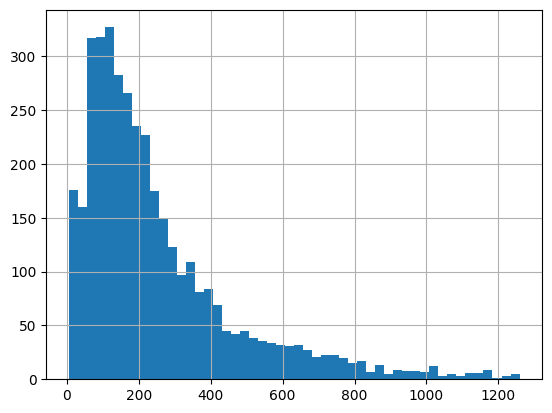

In [47]:
ds_cleaned[ds_cleaned['duration']<2000]['duration'].hist(bins=50)

In [48]:
ds_claster['duration_missing'] = ds_claster['duration'].isnull().astype(int)
ds_claster['cluster_duration'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_duration')['duration_missing'].mean())

cluster_duration
0    0.107595
1    0.022121
2    0.174635
Name: duration_missing, dtype: float64


Так як значення при кастеризації значно відрізняються один від однго, то можна припусти, що вони не випадково відсутні, в таму випадку можна застосувати метод заміни відсутніх даних на значення кінця розподілу.


In [49]:
# Обчислюємо 1-й перцентиль
percentile = ds_cleaned['duration'].quantile(0.01)

percentile

ds_cleaned['duration_end_of_distribution_imputation'] = ds_cleaned['duration'].fillna(percentile)


In [50]:
ds_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,y,age_median,duration_end_of_distribution_imputation
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,...,19,oct,79.0,1.0,-1,0.0,unknown,no,30.0,79.0
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,...,11,may,220.0,1.0,339,4.0,failure,no,33.0,220.0
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,...,16,apr,185.0,1.0,330,1.0,failure,no,35.0,185.0
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,...,3,jun,199.0,4.0,-1,0.0,unknown,no,30.0,199.0
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,...,5,may,226.0,1.0,-1,0.0,unknown,no,59.0,226.0


<Axes: >

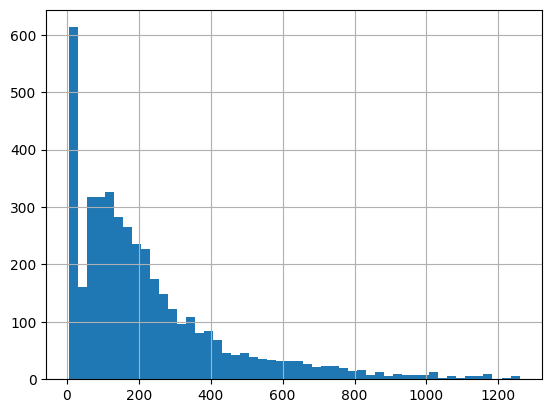

In [51]:
ds_cleaned[ds_cleaned['duration_end_of_distribution_imputation']<2000]['duration_end_of_distribution_imputation'].hist(bins=50)

In [52]:
ds_cleaned.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,age_median,duration_end_of_distribution_imputation
count,4224.000000,3863.000000,3968.000000,4224.000000,4224.000000,3787.000000,4148.000000,4224.000000,4145.000000,4224.000000,4224.000000
mean,2264.161458,2267.837691,41.084677,1051.143229,15.943419,252.758384,2.782064,38.321970,0.537756,40.958333,227.746922
std,1302.925964,1302.772854,10.532454,1611.726843,8.264733,219.573889,2.942704,95.852633,1.709497,10.220337,220.558471
min,0.000000,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000,19.000000,5.000000
25%,1139.750000,1149.500000,33.000000,62.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,33.000000,78.000000
50%,2260.500000,2262.000000,39.000000,422.500000,16.000000,185.000000,2.000000,-1.000000,0.000000,39.000000,163.000000
75%,3397.250000,3405.500000,48.000000,1323.500000,21.000000,328.000000,3.000000,-1.000000,0.000000,48.000000,299.000000
max,4520.000000,4520.000000,87.000000,8515.000000,31.000000,1259.000000,25.000000,541.000000,25.000000,87.000000,1259.000000


Для даної колонки, я вирішила взяти не останій (99) елемент а перший, для кращого вигляду розподілу та правильного натренування моделі.

### Опрацювання стовпчика "campaign"

<Axes: >

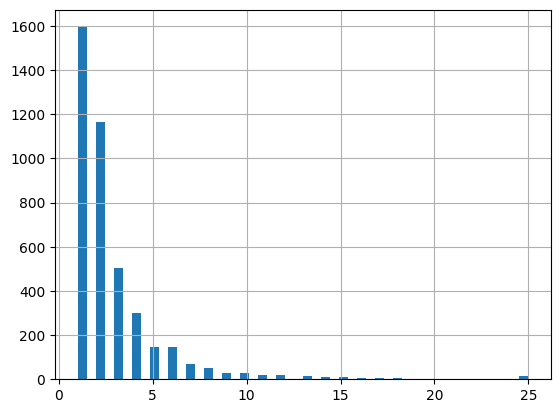

In [53]:
ds_cleaned[ds_cleaned['campaign']<2000]['campaign'].hist(bins=50)

In [54]:
ds_claster['campaign_missing'] = ds_claster['campaign'].isnull().astype(int)
ds_claster['cluster_campaign'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_campaign')['campaign_missing'].mean())

cluster_campaign
0    0.022663
1    0.013568
2    0.019190
Name: campaign_missing, dtype: float64


Так як і в попередньому випадку, видно, що дані відсуні випадково, тому застосую один із методів заміна середнім/медіаним значенням або замінити відсутне значення довільним. Я скористаюся методом заміни на довільне значення.

In [55]:
# first replace with 0
ds_cleaned['campaign_0'] = impute_na(ds_cleaned, 'campaign', 0)

# first replace with 1
ds_cleaned['campaign_1'] = impute_na(ds_cleaned, 'campaign', 1)
ds_cleaned.head(5)

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,...,duration,campaign,pdays,previous,poutcome,y,age_median,duration_end_of_distribution_imputation,campaign_0,campaign_1
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,...,79.0,1.0,-1,0.0,unknown,no,30.0,79.0,1.0,1.0
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,...,220.0,1.0,339,4.0,failure,no,33.0,220.0,1.0,1.0
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,...,185.0,1.0,330,1.0,failure,no,35.0,185.0,1.0,1.0
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,...,199.0,4.0,-1,0.0,unknown,no,30.0,199.0,4.0,4.0
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,...,226.0,1.0,-1,0.0,unknown,no,59.0,226.0,1.0,1.0


<Axes: >

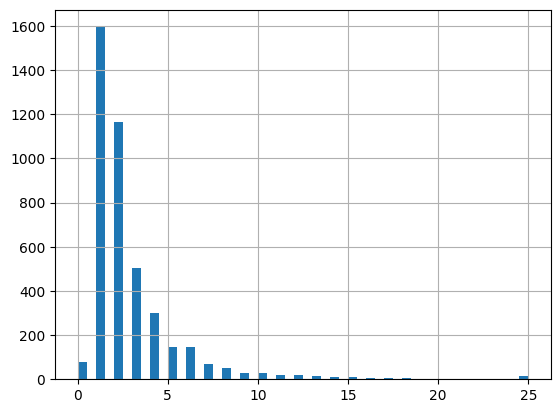

In [56]:
ds_cleaned[ds_cleaned['campaign_0']<2000]['campaign_0'].hist(bins=50)

<Axes: >

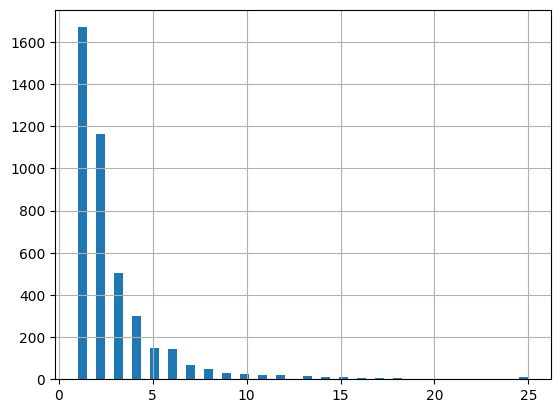

In [57]:
ds_cleaned[ds_cleaned['campaign_1']<2000]['campaign_1'].hist(bins=50)

In [58]:
print('Original variable variance: ', ds_cleaned['campaign'].var())
print('Variance after 0 imputation: ', ds_cleaned['campaign_0'].var())
print('Variance after 1 imputation: ', ds_cleaned['campaign_1'].var())

Original variable variance:  8.65950941287622
Variance after 0 imputation:  8.640452895040866
Variance after 1 imputation:  8.55979161733365


З розподілу видно, що значення, які додані як 0 менше змінюють кореляцію ніж 1, тому для даного датасету, я застосовуватиму саме перше заповнення (заповнення 0)

In [59]:
ds_cleaned = ds_cleaned.drop('campaign_1', axis=1)

ds_cleaned.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,age_median,duration_end_of_distribution_imputation,campaign_0
count,4224.000000,3863.000000,3968.000000,4224.000000,4224.000000,3787.000000,4148.000000,4224.000000,4145.000000,4224.000000,4224.000000,4224.000000
mean,2264.161458,2267.837691,41.084677,1051.143229,15.943419,252.758384,2.782064,38.321970,0.537756,40.958333,227.746922,2.732008
std,1302.925964,1302.772854,10.532454,1611.726843,8.264733,219.573889,2.942704,95.852633,1.709497,10.220337,220.558471,2.939465
min,0.000000,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000,19.000000,5.000000,0.000000
25%,1139.750000,1149.500000,33.000000,62.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,33.000000,78.000000,1.000000
50%,2260.500000,2262.000000,39.000000,422.500000,16.000000,185.000000,2.000000,-1.000000,0.000000,39.000000,163.000000,2.000000
75%,3397.250000,3405.500000,48.000000,1323.500000,21.000000,328.000000,3.000000,-1.000000,0.000000,48.000000,299.000000,3.000000
max,4520.000000,4520.000000,87.000000,8515.000000,31.000000,1259.000000,25.000000,541.000000,25.000000,87.000000,1259.000000,25.000000


### Опрацювання останьої числової колонки "previous"

<Axes: >

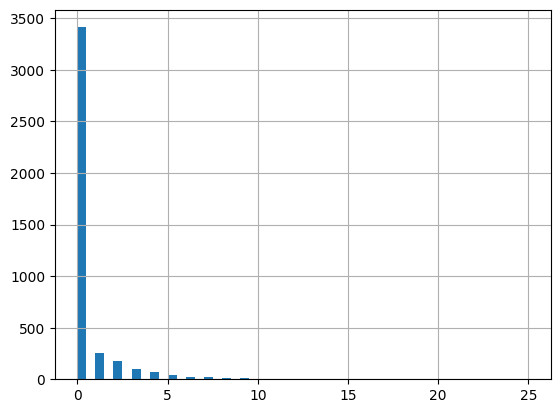

In [60]:
ds_cleaned[ds_cleaned['previous']<2000]['previous'].hist(bins=50)

In [61]:
ds_claster['previous_missing'] = ds_claster['previous'].isnull().astype(int)
ds_claster['cluster_previous'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_previous')['previous_missing'].mean())

cluster_previous
0    0.019263
1    0.019095
2    0.014925
Name: previous_missing, dtype: float64


Так як видн з креляції, що дані відсутні випадково, то можна застсувати метод середньої заміни значень.

In [62]:
mean = round(ds_cleaned["previous"].mean())
# ds_cleaned = ds_cleaned.drop('previous_mean', axis=1)

mean 

1

In [63]:
ds_cleaned["previous_mean"] = impute_na(ds_cleaned, "previous", mean)

ds_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,...,duration,campaign,pdays,previous,poutcome,y,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,...,79.0,1.0,-1,0.0,unknown,no,30.0,79.0,1.0,0.0
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,...,220.0,1.0,339,4.0,failure,no,33.0,220.0,1.0,4.0
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,...,185.0,1.0,330,1.0,failure,no,35.0,185.0,1.0,1.0
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,...,199.0,4.0,-1,0.0,unknown,no,30.0,199.0,4.0,0.0
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,...,226.0,1.0,-1,0.0,unknown,no,59.0,226.0,1.0,0.0


In [64]:
print('Original variable variance: ', ds_cleaned['previous'].var())
print('Variance after mean imputation: ', ds_cleaned['previous_mean'].var())

Original variable variance:  2.9223796172529584
Variance after mean imputation:  2.871632797307673


<Axes: >

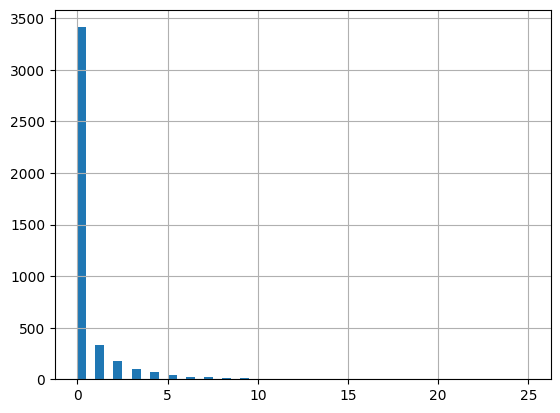

In [65]:
ds_cleaned[ds_cleaned['previous_mean']<2000]['previous_mean'].hist(bins=50)

Усі числові стовчики було заповнено значеннями, тепер заповню до категоріальні

In [66]:
ds_cleaned = ds_cleaned.drop('previous',axis=1)
ds_cleaned = ds_cleaned.drop('age',axis=1)
ds_cleaned = ds_cleaned.drop('duration',axis=1)
ds_cleaned = ds_cleaned.drop('campaign',axis=1)
ds_cleaned = ds_cleaned.drop('Unnamed: 0',axis=1)



r = 0
missing = list()
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nВ скількох колонках пропущенні значення: ", r)


job 79 	 1.87 %
marital 76 	 1.8 %
education 424 	 10.04 %
default 256 	 6.06 %
housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

В скількох колонках пропущенні значення:  8


### Опрацювання колонки "job"

In [67]:
ds_cleaned.head()

,Unnamed: 0.1,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,poutcome,y,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean
0,0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,-1,unknown,no,30.0,79.0,1.0,0.0
1,1,services,married,secondary,no,4789,yes,yes,cellular,11,may,339,failure,no,33.0,220.0,1.0,4.0
2,2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,330,failure,no,35.0,185.0,1.0,1.0
3,3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,-1,unknown,no,30.0,199.0,4.0,0.0
4,4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,-1,unknown,no,59.0,226.0,1.0,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_55112\4050041231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="job", data=ds, palette="dark")


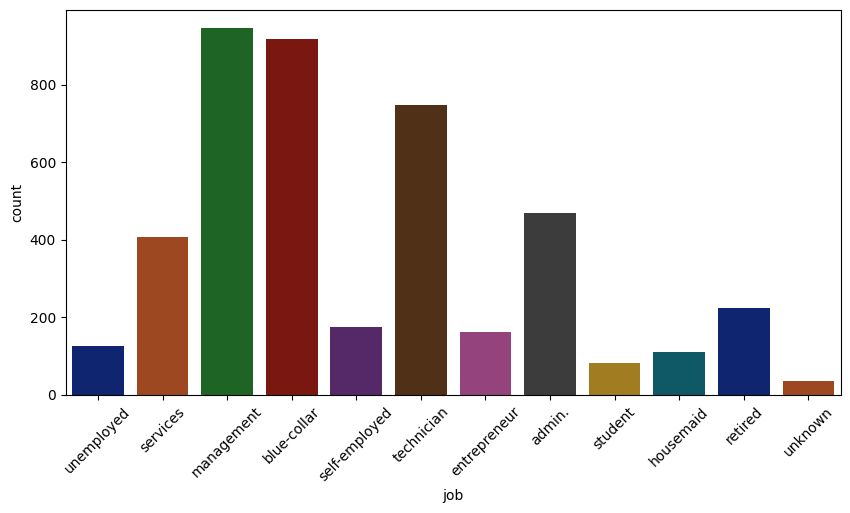

In [68]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.countplot(x="job", data=ds, palette="dark")
plt.xticks(rotation=45)
plt.show()

In [69]:
ds_claster['job_missing'] = ds_claster['job'].isnull().astype(int)
ds_claster['cluster_job'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_job')['job_missing'].mean())

cluster_job
0    0.019134
1    0.014768
2    0.019274
Name: job_missing, dtype: float64


У результаті кореляції видно, що дані відсутні випадково, також там в колонці є катеорія "unknown" тому логічніше було би помістити всі значення відсутні в цю категорію

In [70]:
ds_cleaned['job'].fillna('unknown', inplace=True)

for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)

marital 76 	 1.8 %
education 424 	 10.04 %
default 256 	 6.06 %
housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %


C:\Users\user\AppData\Local\Temp\ipykernel_55112\3112651479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['job'].fillna('unknown', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_55112\4050041231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="job", data=ds, palette="dark")


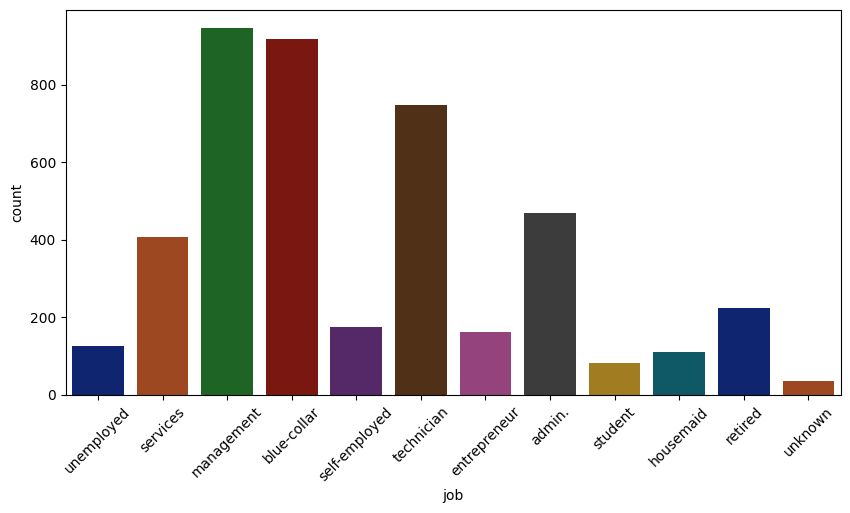

In [71]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.countplot(x="job", data=ds, palette="dark")
plt.xticks(rotation=45)
plt.show()

### Опрацювання колонки "marital"

C:\Users\user\AppData\Local\Temp\ipykernel_55112\3481149873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="marital", data=ds, palette="dark")


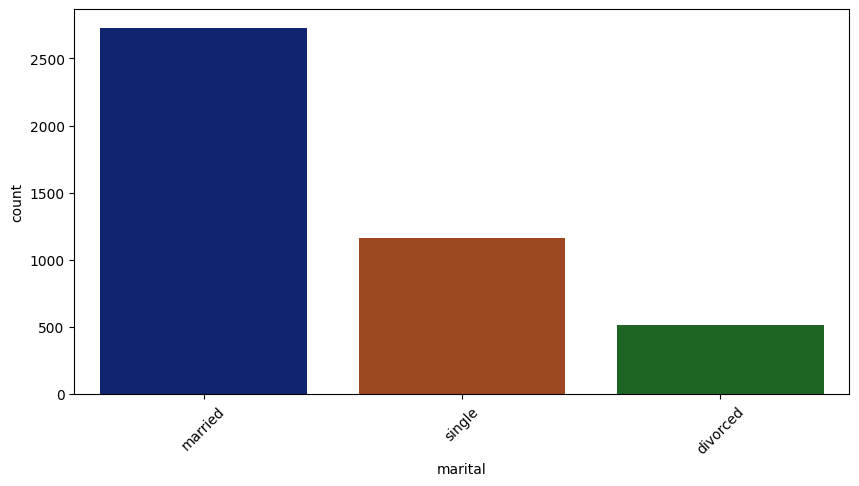

In [72]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.countplot(x="marital", data=ds, palette="dark")
plt.xticks(rotation=45)
plt.show()

In [73]:
ds_claster['marital_missing'] = ds_claster['marital'].isnull().astype(int)
ds_claster['cluster_marital'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_marital')['marital_missing'].mean())

cluster_marital
0    0.013568
1    0.022663
2    0.019190
Name: marital_missing, dtype: float64


Дивлячись на кластеризацію можна припустити, що дан відсутні випадково, тому можна застосувати метод заміни відсутніх значень на  категорію, що найчастіше зустрічається.

Text(0.5, 0, 'marital')

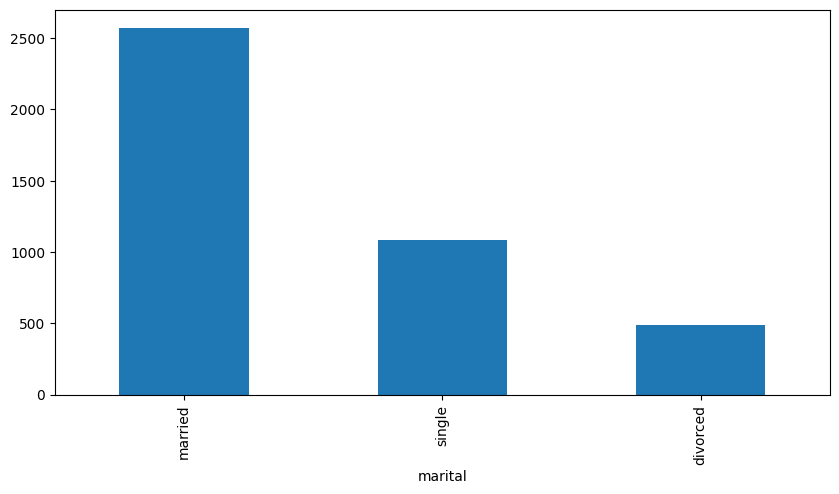

In [74]:
ds_cleaned['marital'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('marital')

In [75]:
most_frequent_category = ds_cleaned['marital'].mode()[0]
ds_cleaned['marital'].fillna(most_frequent_category, inplace=True)

missing_count = ds_cleaned['marital'].isna().sum()
print(f"Кількість пропущених значень у колонці 'marital': {missing_count}")


Кількість пропущених значень у колонці 'marital': 0


C:\Users\user\AppData\Local\Temp\ipykernel_55112\3921003765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['marital'].fillna(most_frequent_category, inplace=True)


In [76]:
ds_cleaned[ds_cleaned['marital'].isnull()]['marital'].head()

Series([], Name: marital, dtype: object)

Text(0.5, 0, 'marital')

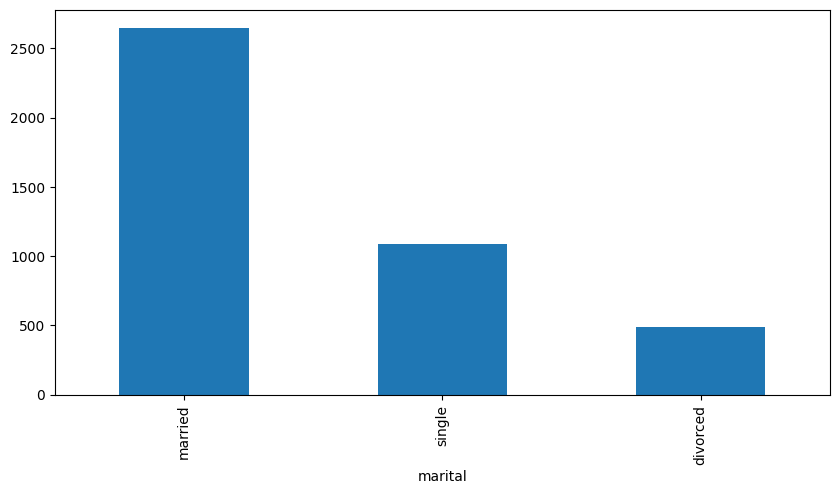

In [77]:
ds_cleaned['marital'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('marital')


In [78]:
r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

education 424 	 10.04 %
default 256 	 6.06 %
housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

count of missing colomn: 6


### Опрацювання колонки "education"

Text(0.5, 0, 'education')

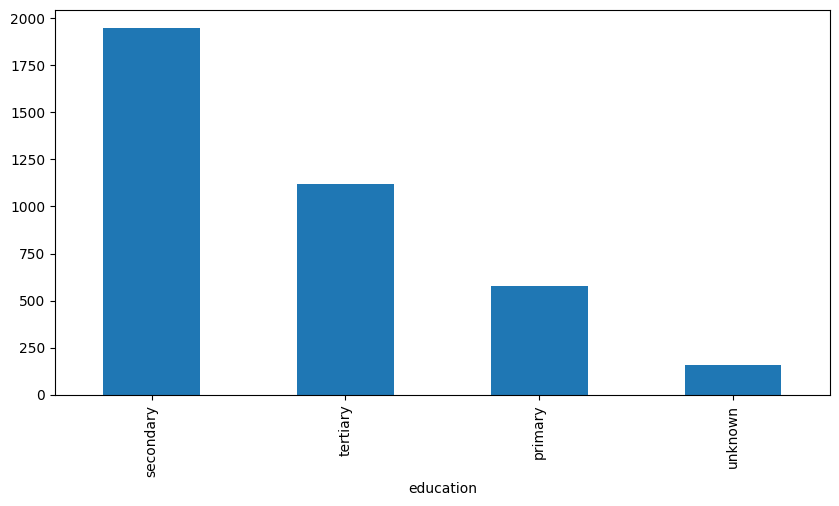

In [79]:
ds_cleaned['education'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('education')

In [80]:
ds_claster['education_missing'] = ds_claster['education'].isnull().astype(int)
ds_claster['cluster_education'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_education')['education_missing'].mean())

cluster_education
0    0.105382
1    0.092965
2    0.113006
Name: education_missing, dtype: float64


Так як є категорія "unknown", то логічніше було би всі відсутні дані заповнити цією категорією, навіть якщо дані відсутні випадково та їх відсоток складає 10%

C:\Users\user\AppData\Local\Temp\ipykernel_55112\1654309676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['education'].fillna('unknown', inplace=True)


Text(0.5, 0, 'education')

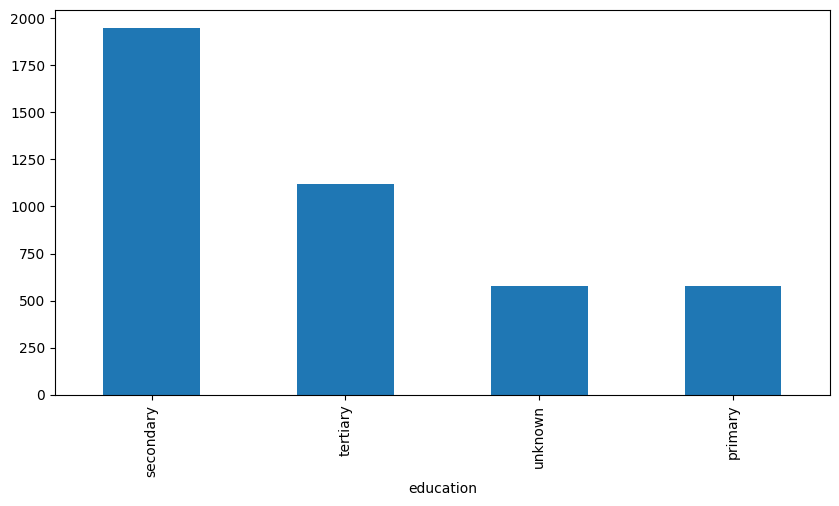

In [81]:
ds_cleaned['education'].fillna('unknown', inplace=True)

ds_cleaned['education'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('education')

In [82]:
r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

default 256 	 6.06 %
housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

count of missing colomn: 5


### Опрацювання колонки "default"

Text(0.5, 0, 'default')

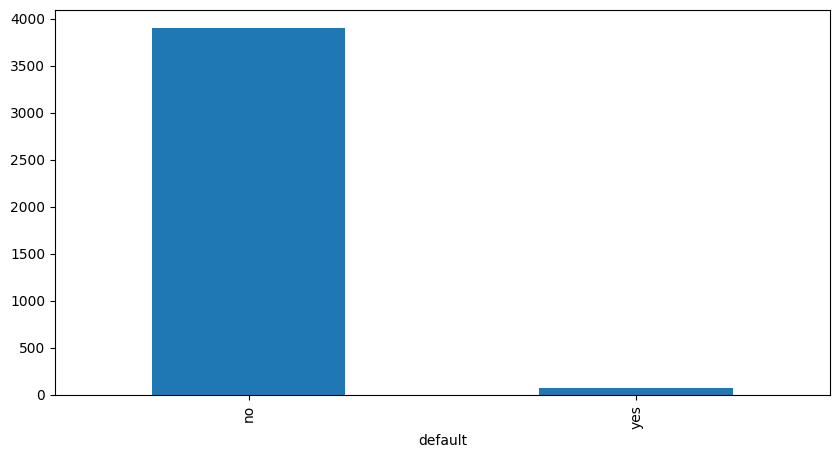

In [83]:
ds_cleaned['default'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('default')

In [84]:
ds_claster['default_missing'] = ds_claster['default'].isnull().astype(int)
ds_claster['cluster_default'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_default')['default_missing'].mean())

cluster_default
0    0.061276
1    0.059490
2    0.061966
Name: default_missing, dtype: float64


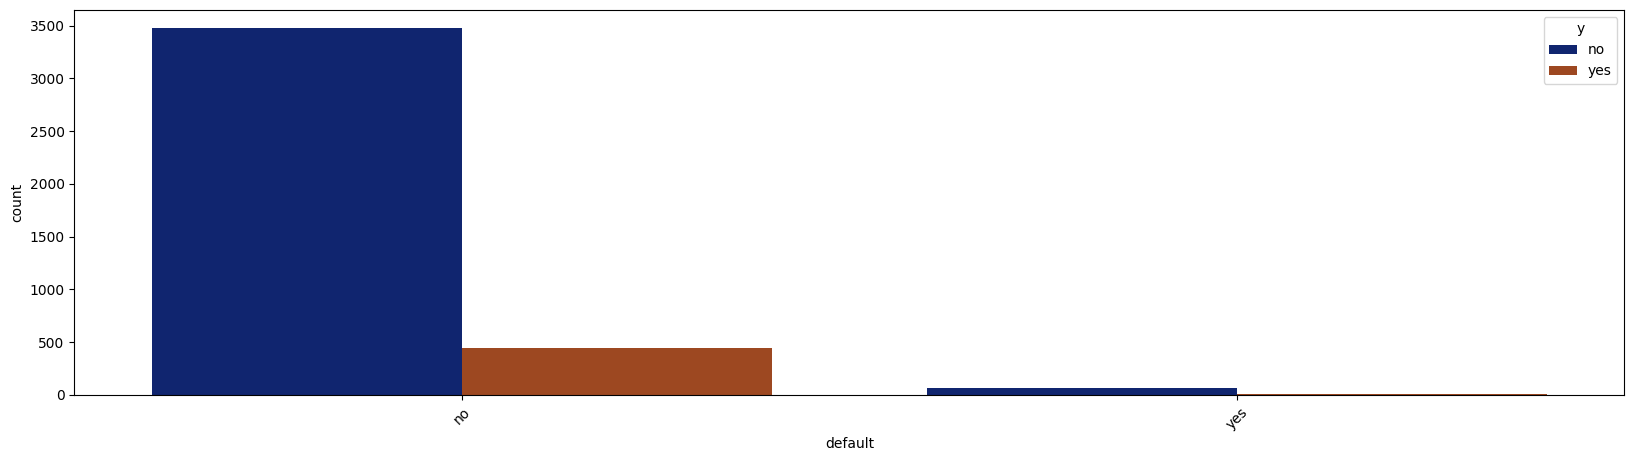

In [85]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="default", hue="y", data=ds, palette="dark")
plt.xticks(rotation=45)

plt.show()

Дивлячись на графік та кластер, видно, що дані відсутні випадково, також кількість відсутніх даних 6% і найчастіша категорія це "no", тому можна застосувати метод заміни на частішу категорію або створити нову категорію "unknown" та всі відсуні значення помістити в неї, я вибрала перший варіант

C:\Users\user\AppData\Local\Temp\ipykernel_55112\547273970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['default'].fillna(ds_cleaned['default'].mode()[0], inplace=True)


Text(0.5, 0, 'default')

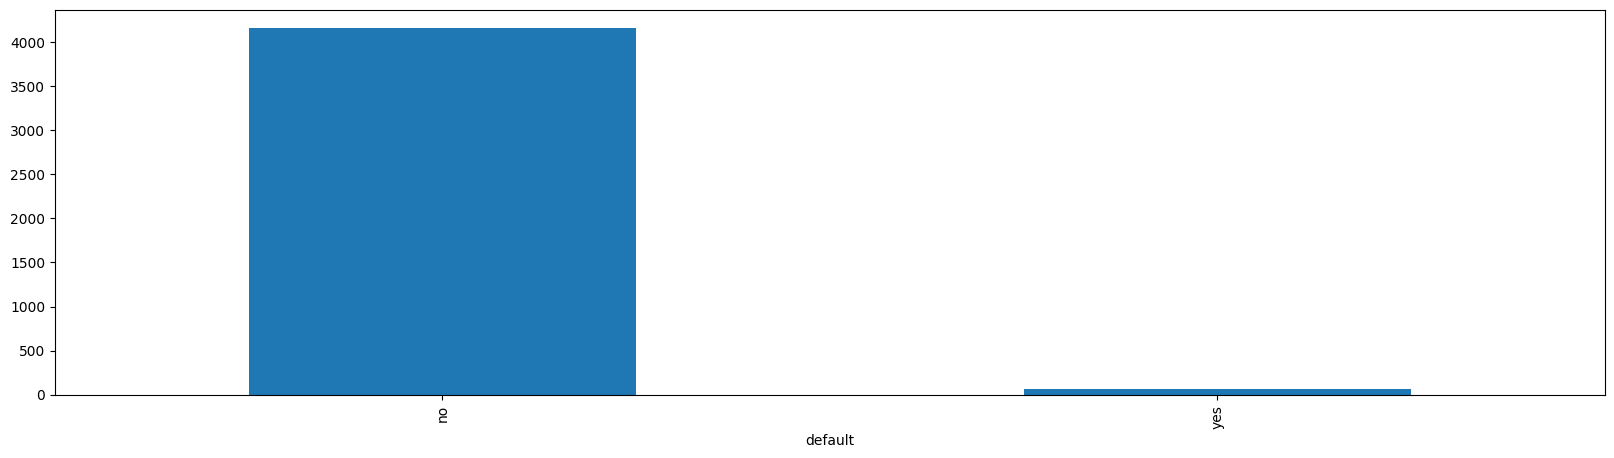

In [86]:
# ds_cleaned = ds_cleaned.drop('default_missing', axis=1)
ds_cleaned['default'].fillna(ds_cleaned['default'].mode()[0], inplace=True)

ds_cleaned['default'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('default')

In [87]:
r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

housing 361 	 8.55 %
loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

count of missing colomn: 4


### Опрацювання колонки "housing"

Text(0.5, 0, 'housing')

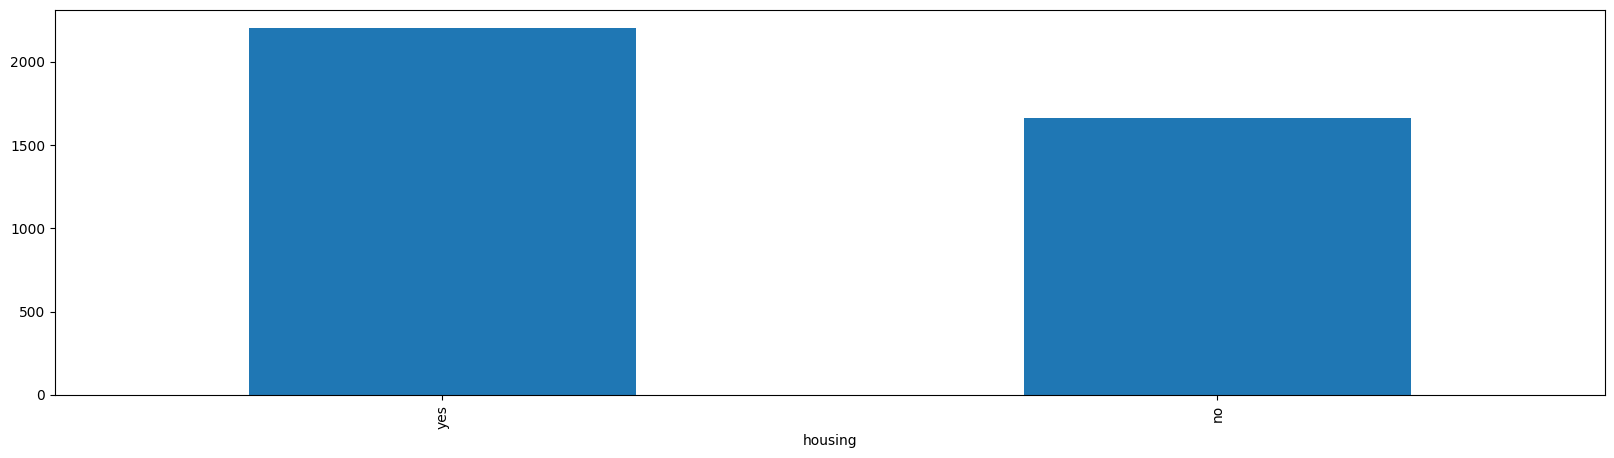

In [88]:
ds_cleaned['housing'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('housing')

In [89]:
ds_claster['housing_missing'] = ds_claster['housing'].isnull().astype(int)
ds_claster['cluster_housing'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_housing')['housing_missing'].mean())

cluster_housing
0    0.088608
1    0.000000
2    0.160544
Name: housing_missing, dtype: float64


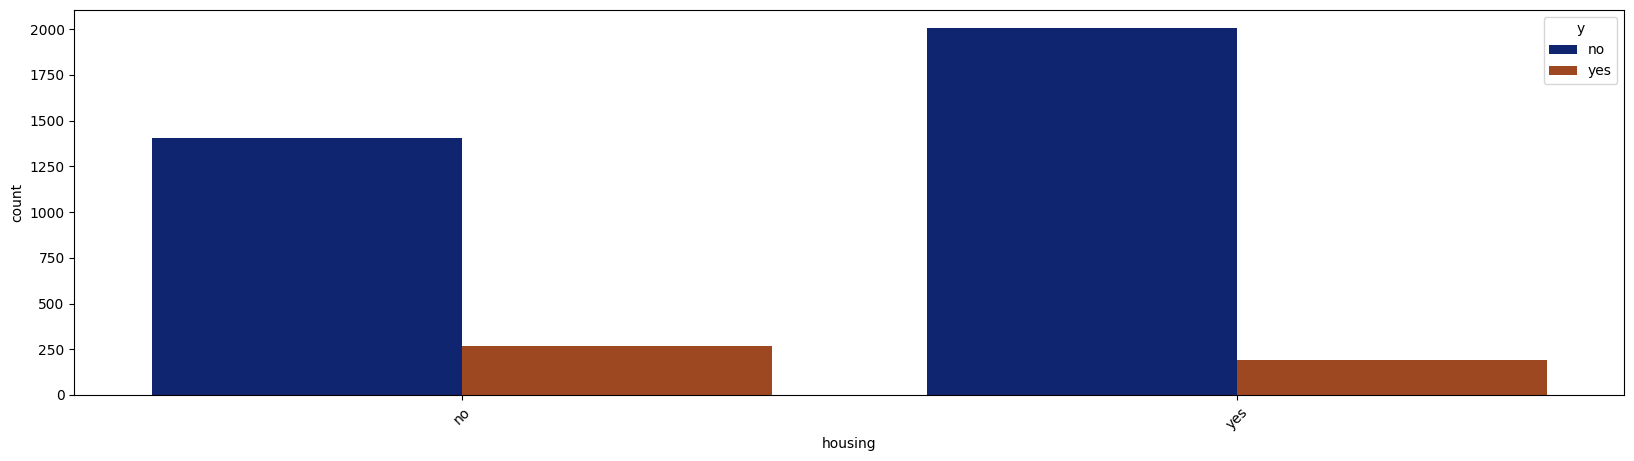

In [90]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="housing", hue="y", data=ds, palette="dark")
plt.xticks(rotation=45)

plt.show()

Так як з кластеризації видно, що дані відсутні не випадково та їх відсоток є 8.5%, то огічніше було би тут застосувати метод заміна відсутніх даних довільним, тобто створення нової категорії, я буду створювати таку категорію як "missing"

C:\Users\user\AppData\Local\Temp\ipykernel_55112\589134099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned["housing"].fillna('missing', inplace=True)


Text(0.5, 0, 'housing')

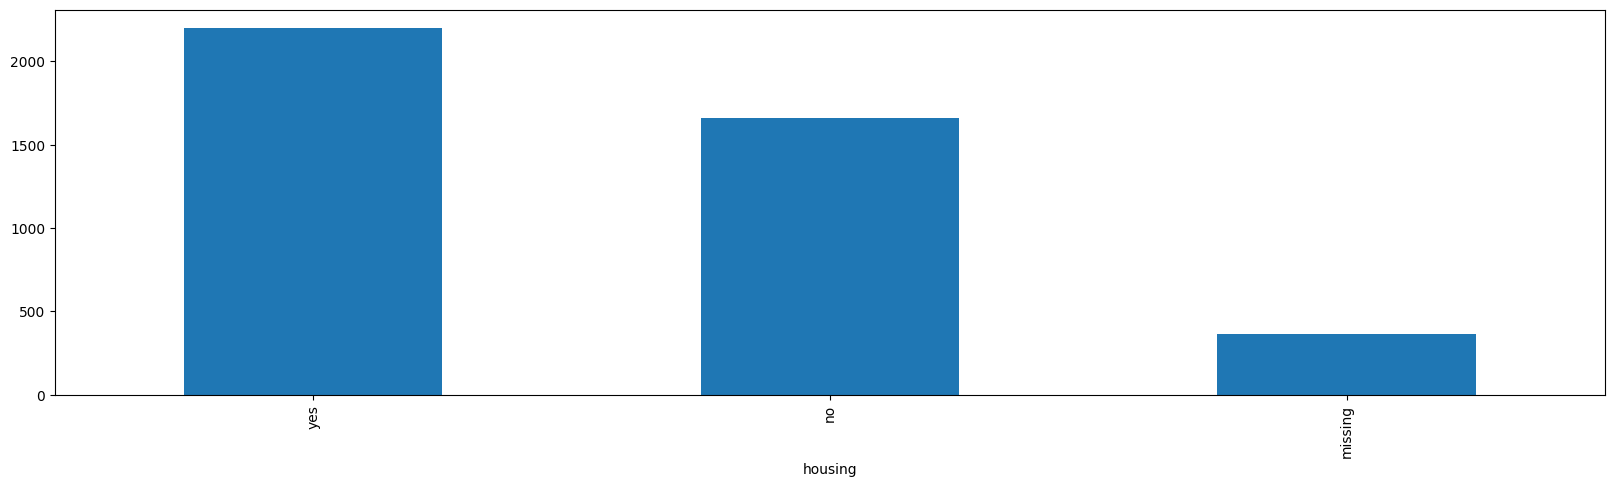

In [91]:
ds_cleaned["housing"].fillna('missing', inplace=True)

ds_cleaned['housing'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('housing')

In [92]:
r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

count of missing colomn: 3


### Опрацювання колонки "loan"

Text(0.5, 0, 'loan')

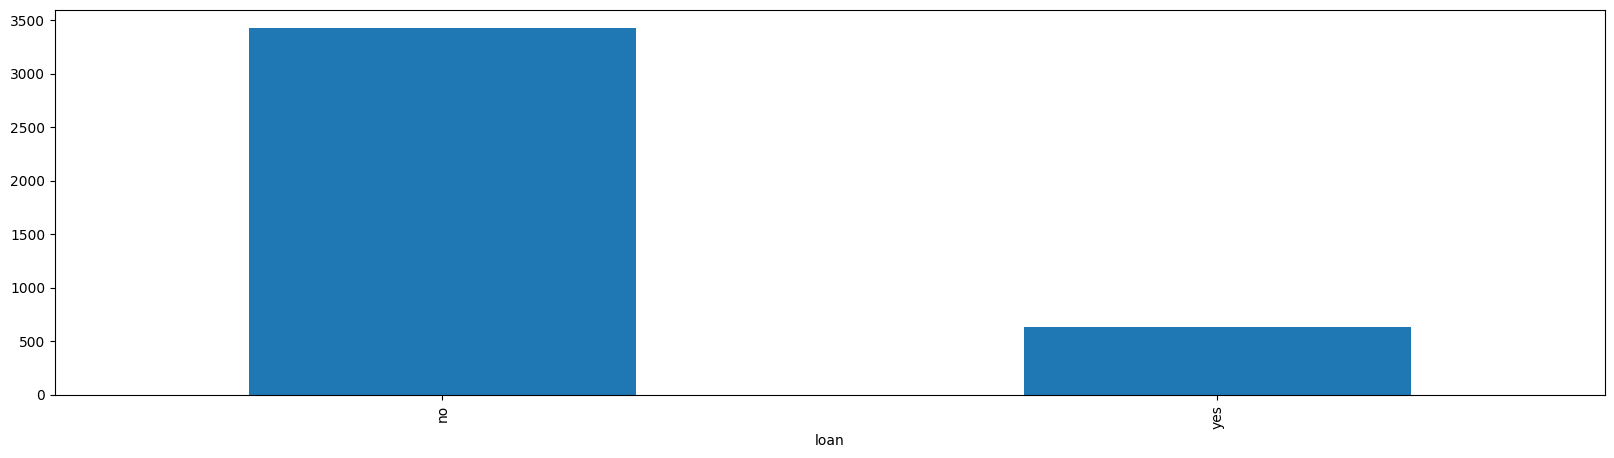

In [93]:
ds_cleaned['loan'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('loan')

In [94]:
ds_claster['loan_missing'] = ds_claster['loan'].isnull().astype(int)
ds_claster['cluster_loan'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_loan')['loan_missing'].mean())

cluster_loan
0    0.031722
1    0.045944
2    0.050526
Name: loan_missing, dtype: float64


З кластеризації видно, що дан відсутні випадково, та їх відсоток є менший ніж 4%, тому можна застосувати такі методи як звміни відсутніх значень на категорію або заміна відсутнх значень випадковим, для різноманітності, я виберу другий метод.

In [95]:
ds_cleaned["loan_imputed"] = ds_cleaned['loan'].copy()

random_sample_train = ds_cleaned['loan'].dropna().sample(
    ds_cleaned['loan'].isnull().sum(), random_state=0)

random_sample_train.index = ds_cleaned[ds_cleaned['loan'].isnull()].index

ds_cleaned.loc[ds_cleaned['loan'].isnull(), 'loan_imputed'] = random_sample_train

In [96]:
missing_count_before = ds_cleaned['loan'].isnull().sum()
missing_count_after = ds_cleaned['loan_imputed'].isnull().sum()

print(f"Кількість пропущених значень до: {missing_count_before}")
print(f"Кількість пропущених значень після: {missing_count_after}")


Кількість пропущених значень до: 168
Кількість пропущених значень після: 0


In [97]:
# ds_cleaned = ds_cleaned.drop("loan", axis=1)

r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

loan 168 	 3.98 %
contact 79 	 1.87 %
y 168 	 3.98 %

count of missing colomn: 3


### Опрацювання колонки "contact"

Text(0.5, 0, 'contact')

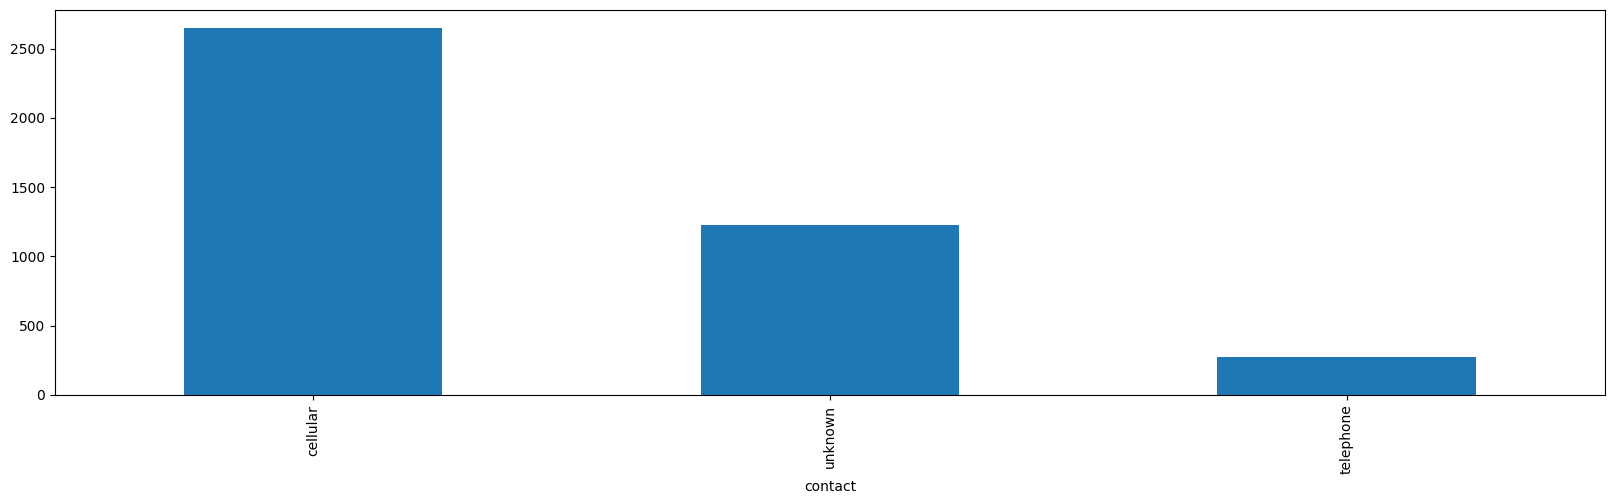

In [98]:
ds_cleaned['contact'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('contact')

In [99]:
ds_claster['contact_missing'] = ds_claster['contact'].isnull().astype(int)
ds_claster['cluster_contact'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_contact')['contact_missing'].mean())

cluster_contact
0    0.019153
1    0.019285
2    0.014675
Name: contact_missing, dtype: float64


Дані відсутні випадково, їх мала кількість (не більше 2%), також є категорія "unknown", тому логічно, що всі відсутн дані можна помісити в цю колонку.

C:\Users\user\AppData\Local\Temp\ipykernel_55112\3709552046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['contact'].fillna('unknown', inplace=True)


Text(0.5, 0, 'contact')

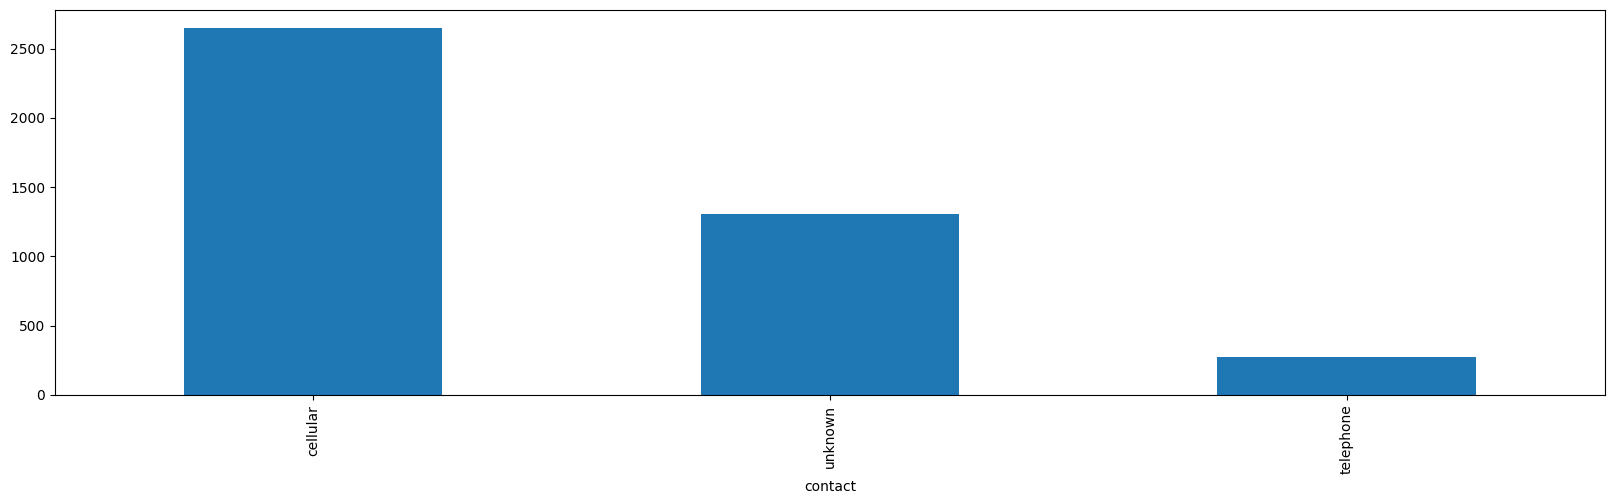

In [100]:
ds_cleaned['contact'].fillna('unknown', inplace=True)

ds_cleaned['contact'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('contact')

In [101]:
ds_cleaned = ds_cleaned.drop("loan", axis=1)

r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)

y 168 	 3.98 %

count of missing colomn: 1


### Опрацювання колонки "y"

Text(0.5, 0, 'y')

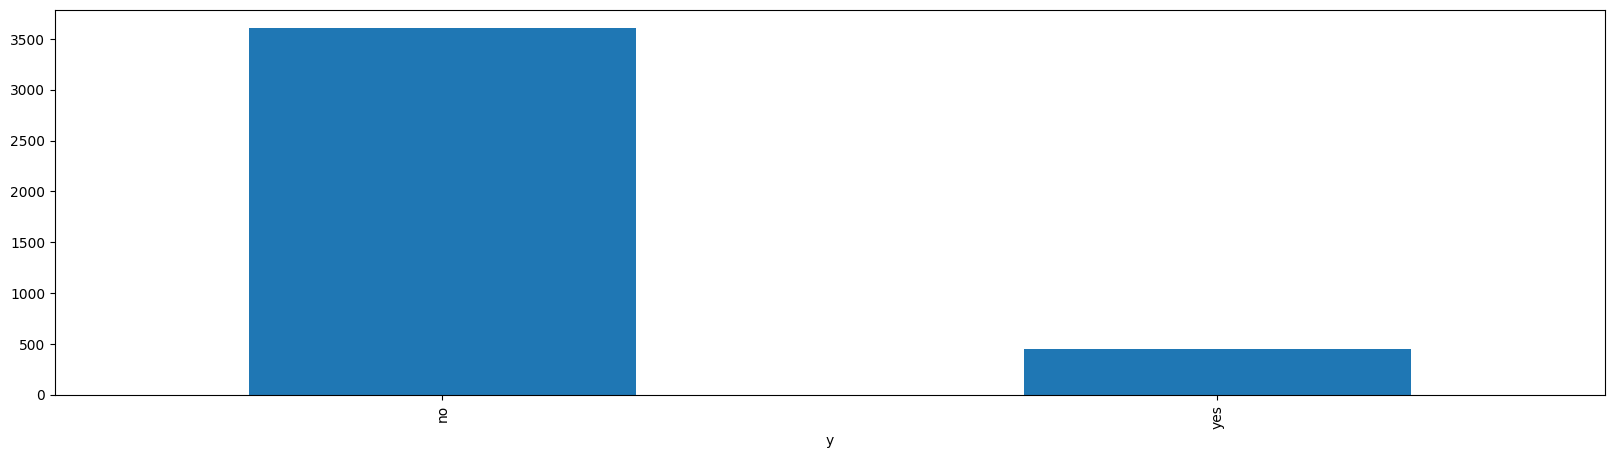

In [102]:
ds_cleaned['y'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('y')

In [103]:
ds_claster['y_missing'] = ds_claster['y'].isnull().astype(int)
ds_claster['cluster_y'] = kmeans.fit_predict(features)

# Перевірте пропуски в залежності від кластера
print(ds_claster.groupby('cluster_y')['y_missing'].mean())

cluster_y
0    0.031754
1    0.045944
2    0.050314
Name: y_missing, dtype: float64


Так як з кластера відомо, що дані відсутні випадково, також відсоток їх відсутності н більше 4%, то можна застосувати метод заповнення на нафпопулярнішу категорію.

C:\Users\user\AppData\Local\Temp\ipykernel_55112\2802258609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_cleaned['y'].fillna(ds_cleaned['y'].mode()[0], inplace=True)


Text(0.5, 0, 'y')

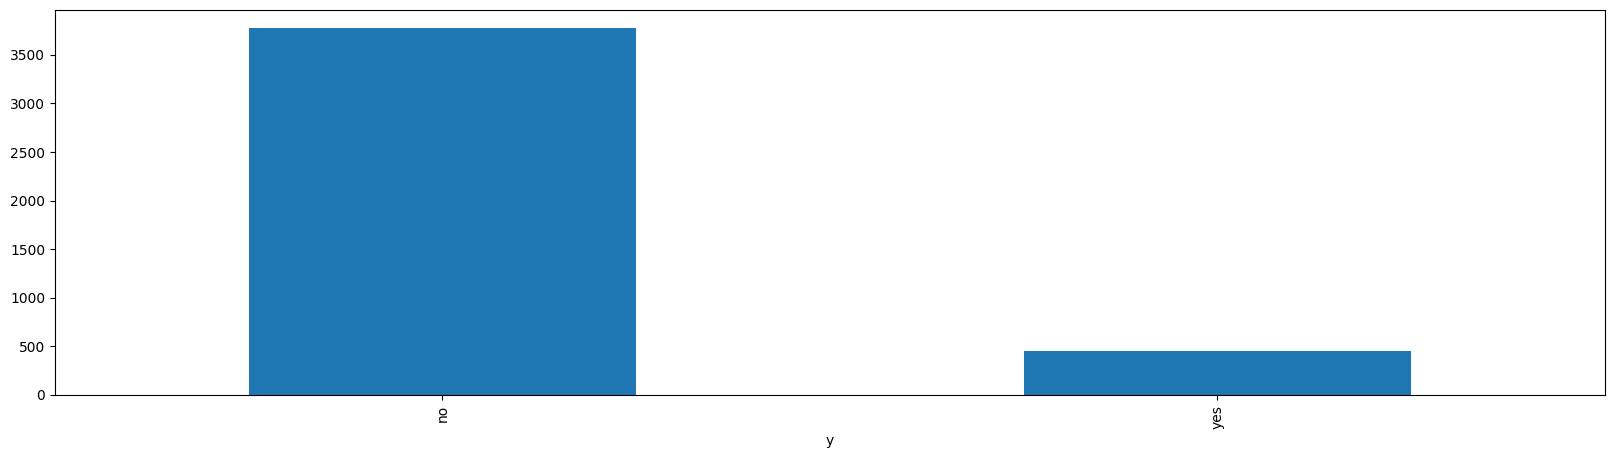

In [104]:
ds_cleaned['y'].fillna(ds_cleaned['y'].mode()[0], inplace=True)

ds_cleaned['y'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('y')

In [105]:
r= 0
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)


count of missing colomn: 0


Так як тепер немає ні одної колонки, я якої можуть бути відсутні значення, то переду до етапу "кодування категоріальних ознак"

## Кодування категоріальних ознак

на цьому етапі я перетворюватиму всі категріальні стовпчики в числові, та додаватиму їх до нового датасету "ds_encoding"

In [106]:
ds_encoding = ds_cleaned.copy()

ds_encoding = ds_encoding.drop('Unnamed: 0.1', axis=1)
ds_encoding

,job,marital,education,default,balance,housing,contact,day,month,pdays,poutcome,y,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,loan_imputed
0,unemployed,married,primary,no,1787,no,cellular,19,oct,-1,unknown,no,30.0,79.0,1.0,0.0,no
1,services,married,secondary,no,4789,yes,cellular,11,may,339,failure,no,33.0,220.0,1.0,4.0,yes
2,management,single,tertiary,no,1350,yes,cellular,16,apr,330,failure,no,35.0,185.0,1.0,1.0,no
3,management,married,tertiary,no,1476,yes,unknown,3,jun,-1,unknown,no,30.0,199.0,4.0,0.0,yes
4,blue-collar,married,secondary,no,0,yes,unknown,5,may,-1,unknown,no,59.0,226.0,1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,services,single,secondary,no,473,yes,cellular,7,jul,-1,unknown,no,32.0,624.0,5.0,0.0,no
4516,services,married,secondary,no,-333,yes,cellular,30,jul,-1,unknown,no,33.0,329.0,5.0,0.0,no
4518,technician,married,secondary,no,295,no,cellular,19,aug,-1,unknown,no,57.0,151.0,11.0,0.0,no
4519,blue-collar,married,secondary,no,1137,no,cellular,6,feb,211,other,no,28.0,129.0,4.0,3.0,no


In [107]:
ds_encoding.head()

,job,marital,education,default,balance,housing,contact,day,month,pdays,poutcome,y,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,loan_imputed
0,unemployed,married,primary,no,1787,no,cellular,19,oct,-1,unknown,no,30.0,79.0,1.0,0.0,no
1,services,married,secondary,no,4789,yes,cellular,11,may,339,failure,no,33.0,220.0,1.0,4.0,yes
2,management,single,tertiary,no,1350,yes,cellular,16,apr,330,failure,no,35.0,185.0,1.0,1.0,no
3,management,married,tertiary,no,1476,yes,unknown,3,jun,-1,unknown,no,30.0,199.0,4.0,0.0,yes
4,blue-collar,married,secondary,no,0,yes,unknown,5,may,-1,unknown,no,59.0,226.0,1.0,0.0,no


In [108]:
non_numeric_columns = ds_encoding.select_dtypes(exclude=['number'])

print("All categorical column")
for idx, column in enumerate(non_numeric_columns.columns, start=1):
    print(f"{idx}. {column}")

All categorical column
1. job
2. marital
3. education
4. default
5. housing
6. contact
7. month
8. poutcome
9. y
10. loan_imputed


In [109]:
ds_encoding['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [110]:
ds_encoding['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [111]:
ds_encoding['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [112]:
ds_encoding['default'].unique()

array(['no', 'yes'], dtype=object)

In [113]:
ds_encoding['housing'].unique()

array(['no', 'yes', 'missing'], dtype=object)

In [114]:
ds_encoding['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [115]:
ds_encoding['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'nov', 'jul',
       'sep', 'mar', 'dec'], dtype=object)

In [116]:
ds_encoding['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [117]:
ds_encoding['y'].unique()

array(['no', 'yes'], dtype=object)

In [118]:
ds_encoding['loan_imputed'].unique()

array(['no', 'yes'], dtype=object)

Для кращого розуміння та прланування, я одразу ж поділю для кожної колонки методи, які в них я буду застосовувати:

1. job - Integer encoding

2. marital - Ordered Integer Encoding

3. education - OHE (через наявність категорії "unknown", яку можна не додавати як колонку)

4. default - ONE (через наявність лише двох категорій)

5. housing - ONE (через наявність лише двох категорій)

6. contact - ONE (через наявність категорії "unknown", яку можна не додавати як колонку)


7. month - Count or frequency encoding

8. poutcome - ONE (через наявність категорії "unknown", яку можна не додавати як колонку)


9. y - ONE (через наявність лише двох категорій)

10. loan_imputed - ONE (через наявність лише двох категорій)

(удосконалений метод ONE я не застосовуватиму, тому що у мене немає великої кількості категорій в якійсь із колонок)

Спочатку перетворю всі колонки з методом ONE, почну з бінарних (тих, які мають лише 2 категорії)

In [119]:
obj_cols = ds_encoding.select_dtypes(include='object').columns.tolist()

ordinal_cols = [col for col in obj_cols if ds_encoding[col].nunique() == 2]
print(ordinal_cols)

# ds_encoding

r= 0
for x in ds_encoding.columns:
    if ds_encoding[x].isnull().sum() != 0:
        print(x, ds_encoding[x].isnull().sum(), "\t",round((ds_encoding[x].isnull().sum()*100)/ds_encoding.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\ncount of missing colomn:", r)


['default', 'y', 'loan_imputed']

count of missing colomn: 0


In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)


for col in ordinal_cols:
  ds_encoding[col] = ds_encoding[col].astype('str')

ohe.fit(ds_encoding[ordinal_cols])
ohe_output = ohe.transform(ds_encoding[ordinal_cols])
ohe_output = pd.DataFrame(ohe_output, index=ds_encoding.index)
ohe_output.columns = ohe.get_feature_names_out(ordinal_cols)
ohe_output = ohe_output.drop(["default_no", "y_no", "loan_imputed_no"], axis=1, errors='ignore')


ohe_output

# ds_encoding


,default_yes,y_yes,loan_imputed_yes
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0
...,...,...,...
4515,0.0,0.0,0.0
4516,0.0,0.0,0.0
4518,0.0,0.0,0.0
4519,0.0,0.0,0.0


In [121]:
ds_encoding = pd.concat([ds_encoding, ohe_output], axis=1)
ds_encoding = ds_encoding.drop(ordinal_cols, axis=1)

ds_encoding

,job,marital,education,balance,housing,contact,day,month,pdays,poutcome,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,default_yes,y_yes,loan_imputed_yes
0,unemployed,married,primary,1787,no,cellular,19,oct,-1,unknown,30.0,79.0,1.0,0.0,0.0,0.0,0.0
1,services,married,secondary,4789,yes,cellular,11,may,339,failure,33.0,220.0,1.0,4.0,0.0,0.0,1.0
2,management,single,tertiary,1350,yes,cellular,16,apr,330,failure,35.0,185.0,1.0,1.0,0.0,0.0,0.0
3,management,married,tertiary,1476,yes,unknown,3,jun,-1,unknown,30.0,199.0,4.0,0.0,0.0,0.0,1.0
4,blue-collar,married,secondary,0,yes,unknown,5,may,-1,unknown,59.0,226.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,services,single,secondary,473,yes,cellular,7,jul,-1,unknown,32.0,624.0,5.0,0.0,0.0,0.0,0.0
4516,services,married,secondary,-333,yes,cellular,30,jul,-1,unknown,33.0,329.0,5.0,0.0,0.0,0.0,0.0
4518,technician,married,secondary,295,no,cellular,19,aug,-1,unknown,57.0,151.0,11.0,0.0,0.0,0.0,0.0
4519,blue-collar,married,secondary,1137,no,cellular,6,feb,211,other,28.0,129.0,4.0,3.0,0.0,0.0,0.0


In [ ]:
ds_encoding.head()

,job,marital,education,balance,housing,contact,day,month,pdays,poutcome,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,default_yes,y_yes,loan_imputed_yes
0,unemployed,married,primary,1787,no,cellular,19,oct,-1,unknown,30.0,79.0,1.0,0.0,0.0,0.0,0.0
1,services,married,secondary,4789,yes,cellular,11,may,339,failure,33.0,220.0,1.0,4.0,0.0,0.0,1.0
2,management,single,tertiary,1350,yes,cellular,16,apr,330,failure,35.0,185.0,1.0,1.0,0.0,0.0,0.0
3,management,married,tertiary,1476,yes,unknown,3,jun,-1,unknown,30.0,199.0,4.0,0.0,0.0,0.0,1.0
4,blue-collar,married,secondary,0,yes,unknown,5,may,-1,unknown,59.0,226.0,1.0,0.0,0.0,0.0,0.0


In [123]:
tmp = pd.get_dummies(ds_encoding['housing'])

tmp = tmp.astype(int)
tmp.index = ds_encoding.index

tmp.drop(columns=['missing'], inplace=True, errors='ignore')
tmp = tmp.rename(columns={'no': 'housing_no'})
tmp = tmp.rename(columns={'yes': 'housing_yes'})



tmp.head()

,housing_no,housing_yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [124]:
ds_encoding = ds_encoding.drop('housing', axis=1)
ds_encoding = pd.concat([ds_encoding, tmp], axis=1)

ds_encoding.head()

,job,marital,education,balance,contact,day,month,pdays,poutcome,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,default_yes,y_yes,loan_imputed_yes,housing_no,housing_yes
0,unemployed,married,primary,1787,cellular,19,oct,-1,unknown,30.0,79.0,1.0,0.0,0.0,0.0,0.0,1,0
1,services,married,secondary,4789,cellular,11,may,339,failure,33.0,220.0,1.0,4.0,0.0,0.0,1.0,0,1
2,management,single,tertiary,1350,cellular,16,apr,330,failure,35.0,185.0,1.0,1.0,0.0,0.0,0.0,0,1
3,management,married,tertiary,1476,unknown,3,jun,-1,unknown,30.0,199.0,4.0,0.0,0.0,0.0,1.0,0,1
4,blue-collar,married,secondary,0,unknown,5,may,-1,unknown,59.0,226.0,1.0,0.0,0.0,0.0,0.0,0,1


In [125]:
tmp = pd.get_dummies(ds_encoding['contact'])

tmp = tmp.astype(int)
tmp.index = ds_encoding.index

tmp.drop(columns=['unknown'], inplace=True, errors='ignore')
tmp = tmp.rename(columns={'cellular': 'contact_cellular'})
tmp = tmp.rename(columns={'telephone': 'contact_telephone'})



tmp.head()

,contact_cellular,contact_telephone
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [126]:
ds_encoding = ds_encoding.drop('contact', axis=1)
ds_encoding = pd.concat([ds_encoding, tmp], axis=1)

ds_encoding.head()

,job,marital,education,balance,day,month,pdays,poutcome,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,default_yes,y_yes,loan_imputed_yes,housing_no,housing_yes,contact_cellular,contact_telephone
0,unemployed,married,primary,1787,19,oct,-1,unknown,30.0,79.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0
1,services,married,secondary,4789,11,may,339,failure,33.0,220.0,1.0,4.0,0.0,0.0,1.0,0,1,1,0
2,management,single,tertiary,1350,16,apr,330,failure,35.0,185.0,1.0,1.0,0.0,0.0,0.0,0,1,1,0
3,management,married,tertiary,1476,3,jun,-1,unknown,30.0,199.0,4.0,0.0,0.0,0.0,1.0,0,1,0,0
4,blue-collar,married,secondary,0,5,may,-1,unknown,59.0,226.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0


In [127]:
ds_encoding['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [128]:
tmp = pd.get_dummies(ds_encoding['education'])

tmp = tmp.astype(int)
tmp.index = ds_encoding.index

tmp.drop(columns=['unknown'], inplace=True, errors='ignore')
tmp = tmp.rename(columns={'primary': 'education_primary'})
tmp = tmp.rename(columns={'secondary': 'education_secondary'})
tmp = tmp.rename(columns={'tertiary': 'education_tertiary'})



tmp.head()

,education_primary,education_secondary,education_tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [129]:
ds_encoding = ds_encoding.drop('education', axis=1)
ds_encoding = pd.concat([ds_encoding, tmp], axis=1)

ds_encoding.head()

,job,marital,balance,day,month,pdays,poutcome,age_median,duration_end_of_distribution_imputation,campaign_0,...,default_yes,y_yes,loan_imputed_yes,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary
0,unemployed,married,1787,19,oct,-1,unknown,30.0,79.0,1.0,...,0.0,0.0,0.0,1,0,1,0,1,0,0
1,services,married,4789,11,may,339,failure,33.0,220.0,1.0,...,0.0,0.0,1.0,0,1,1,0,0,1,0
2,management,single,1350,16,apr,330,failure,35.0,185.0,1.0,...,0.0,0.0,0.0,0,1,1,0,0,0,1
3,management,married,1476,3,jun,-1,unknown,30.0,199.0,4.0,...,0.0,0.0,1.0,0,1,0,0,0,0,1
4,blue-collar,married,0,5,may,-1,unknown,59.0,226.0,1.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0


In [130]:
ds_encoding['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [131]:
tmp = pd.get_dummies(ds_encoding['poutcome'])

tmp = tmp.astype(int)
tmp.index = ds_encoding.index

tmp.drop(columns=['unknown'], inplace=True, errors='ignore')
tmp = tmp.rename(columns={'failure': 'poutcome_failure'})
tmp = tmp.rename(columns={'other': 'poutcome_other'})
tmp = tmp.rename(columns={'success': 'poutcome_success'})



tmp.head()

,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [132]:
ds_encoding = ds_encoding.drop('poutcome', axis=1)
ds_encoding = pd.concat([ds_encoding, tmp], axis=1)

ds_encoding.head()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,unemployed,married,1787,19,oct,-1,30.0,79.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
1,services,married,4789,11,may,339,33.0,220.0,1.0,4.0,...,0,1,1,0,0,1,0,1,0,0
2,management,single,1350,16,apr,330,35.0,185.0,1.0,1.0,...,0,1,1,0,0,0,1,1,0,0
3,management,married,1476,3,jun,-1,30.0,199.0,4.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,blue-collar,married,0,5,may,-1,59.0,226.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [133]:
ds_encoding['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [134]:
ordinal_mapping = {
    k: i
    for i, k in enumerate(ds_encoding['job'].unique(), 0)
}

ordinal_mapping

{'unemployed': 0,
 'services': 1,
 'management': 2,
 'blue-collar': 3,
 'self-employed': 4,
 'technician': 5,
 'entrepreneur': 6,
 'admin.': 7,
 'student': 8,
 'housemaid': 9,
 'retired': 10,
 'unknown': 11}

In [135]:
ds_encoding['job'] = ds_encoding['job'].map(ordinal_mapping)

ds_encoding.head()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0,married,1787,19,oct,-1,30.0,79.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
1,1,married,4789,11,may,339,33.0,220.0,1.0,4.0,...,0,1,1,0,0,1,0,1,0,0
2,2,single,1350,16,apr,330,35.0,185.0,1.0,1.0,...,0,1,1,0,0,0,1,1,0,0
3,2,married,1476,3,jun,-1,30.0,199.0,4.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,3,married,0,5,may,-1,59.0,226.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [136]:
ds_encoding['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [137]:
ds_encoding.groupby(['marital'])['y_yes'].mean().sort_values()

marital
married     0.090669
single      0.129834
divorced    0.140530
Name: y_yes, dtype: float64

In [138]:
ordered_labels = ds_encoding.groupby(['marital'
                                  ])['y_yes'].mean().sort_values().index

ordered_labels

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'married': 0, 'single': 1, 'divorced': 2}

In [139]:
ds_encoding['marital'] = ds_encoding['marital'].map(ordinal_mapping)

ds_encoding.head()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0,0,1787,19,oct,-1,30.0,79.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,4789,11,may,339,33.0,220.0,1.0,4.0,...,0,1,1,0,0,1,0,1,0,0
2,2,1,1350,16,apr,330,35.0,185.0,1.0,1.0,...,0,1,1,0,0,0,1,1,0,0
3,2,0,1476,3,jun,-1,30.0,199.0,4.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,3,0,0,5,may,-1,59.0,226.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [140]:
count_map = ds_encoding['month'].value_counts().to_dict()

count_map

frequency_map = (ds_encoding['month'].value_counts() / len(ds) ).to_dict()
frequency_map

{'may': 0.29396151293961514,
 'jul': 0.1495244414952444,
 'aug': 0.1311656713116567,
 'jun': 0.10683477106834771,
 'nov': 0.0767529307675293,
 'apr': 0.06016368060163681,
 'feb': 0.046671090466710904,
 'jan': 0.029860650298606503,
 'oct': 0.015483300154833,
 'sep': 0.010617120106171201,
 'mar': 0.009953550099535502,
 'dec': 0.0033178500331785005}

In [141]:
ds_encoding['month'] = ds_encoding['month'].map(frequency_map)
ds_encoding.head()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0,0,1787,19,0.015483,-1,30.0,79.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,4789,11,0.293962,339,33.0,220.0,1.0,4.0,...,0,1,1,0,0,1,0,1,0,0
2,2,1,1350,16,0.060164,330,35.0,185.0,1.0,1.0,...,0,1,1,0,0,0,1,1,0,0
3,2,0,1476,3,0.106835,-1,30.0,199.0,4.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,3,0,0,5,0.293962,-1,59.0,226.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [142]:
non_numeric_columns = ds_encoding.select_dtypes(exclude=['number'])

print("All categorical column")
for idx, column in enumerate(non_numeric_columns.columns, start=1):
    print(f"{idx}. {column}")

All categorical column


Тепер всі категоріальні стовпчики перетворила на числові, то можна приступати до остнього кроку - маштабування ознак

### Масштабування значень ознак

In [143]:
ds_encoding.describe()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,4.226089,0.489583,1051.143229,15.943419,0.161009,38.321970,40.958333,227.746922,2.732008,0.546402,...,0.393466,0.521070,0.626657,0.064157,0.136127,0.461174,0.265388,0.106297,0.043324,0.027936
std,2.741144,0.694613,1611.726843,8.264733,0.097086,95.852633,10.220337,220.558471,2.939465,1.694589,...,0.488577,0.499615,0.483749,0.245062,0.342964,0.498549,0.441592,0.308254,0.203609,0.164808
min,0.000000,0.000000,-1746.000000,1.000000,0.003318,-1.000000,19.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,62.000000,9.000000,0.076753,-1.000000,33.000000,78.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,422.500000,16.000000,0.131166,-1.000000,39.000000,163.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,1323.500000,21.000000,0.293962,-1.000000,48.000000,299.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11.000000,2.000000,8515.000000,31.000000,0.293962,541.000000,87.000000,1259.000000,25.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
columns_with_values_gt_1 = ds_encoding.loc[:, (ds_encoding > 1).any()].columns

# Виводимо ці колонки
print("Стовпчики, в яких є значення більше 1:")
for i, col in enumerate(columns_with_values_gt_1, 1):
    print(f"{i}. {col}")

Стовпчики, в яких є значення більше 1:
1. job
2. marital
3. balance
4. day
5. pdays
6. age_median
7. duration_end_of_distribution_imputation
8. campaign_0
9. previous_mean


In [145]:
ds_encoding.to_csv('D:/3Kurs/1Sem/SS/DataSet/variant_6_cleaned_without_scale.csv', index=False)
ds_scaled = ds_encoding.copy()

In [146]:

ds_scaled.describe()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,4.226089,0.489583,1051.143229,15.943419,0.161009,38.321970,40.958333,227.746922,2.732008,0.546402,...,0.393466,0.521070,0.626657,0.064157,0.136127,0.461174,0.265388,0.106297,0.043324,0.027936
std,2.741144,0.694613,1611.726843,8.264733,0.097086,95.852633,10.220337,220.558471,2.939465,1.694589,...,0.488577,0.499615,0.483749,0.245062,0.342964,0.498549,0.441592,0.308254,0.203609,0.164808
min,0.000000,0.000000,-1746.000000,1.000000,0.003318,-1.000000,19.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,62.000000,9.000000,0.076753,-1.000000,33.000000,78.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,422.500000,16.000000,0.131166,-1.000000,39.000000,163.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,1323.500000,21.000000,0.293962,-1.000000,48.000000,299.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11.000000,2.000000,8515.000000,31.000000,0.293962,541.000000,87.000000,1259.000000,25.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
cols_to_scale = ['job', 'marital', 'balance','day', 'pdays', 'age_median', 'duration_end_of_distribution_imputation', 'campaign_0','previous_mean' ]
# ds_scaled[cols_to_scale].describe()

ds_scaled

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0,0,1787,19,0.015483,-1,30.0,79.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,4789,11,0.293962,339,33.0,220.0,1.0,4.0,...,0,1,1,0,0,1,0,1,0,0
2,2,1,1350,16,0.060164,330,35.0,185.0,1.0,1.0,...,0,1,1,0,0,0,1,1,0,0
3,2,0,1476,3,0.106835,-1,30.0,199.0,4.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,3,0,0,5,0.293962,-1,59.0,226.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,1,1,473,7,0.149524,-1,32.0,624.0,5.0,0.0,...,0,1,1,0,0,1,0,0,0,0
4516,1,0,-333,30,0.149524,-1,33.0,329.0,5.0,0.0,...,0,1,1,0,0,1,0,0,0,0
4518,5,0,295,19,0.131166,-1,57.0,151.0,11.0,0.0,...,1,0,1,0,0,1,0,0,0,0
4519,3,0,1137,6,0.046671,211,28.0,129.0,4.0,3.0,...,1,0,1,0,0,1,0,0,1,0


In [148]:
scaler = MinMaxScaler()
ds_scaled[cols_to_scale] = scaler.fit_transform(ds_scaled[cols_to_scale])
ds_scaled[cols_to_scale].describe()

,job,marital,balance,day,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.00000,4224.000000,4224.000000,4224.000000,4224.000000
mean,0.384190,0.244792,0.272599,0.498114,0.07255,0.322917,0.177629,0.109280,0.021856
std,0.249195,0.347306,0.157073,0.275491,0.17685,0.150299,0.175884,0.117579,0.067784
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.176201,0.266667,0.00000,0.205882,0.058214,0.040000,0.000000
50%,0.272727,0.000000,0.211334,0.500000,0.00000,0.294118,0.125997,0.080000,0.000000
75%,0.545455,0.500000,0.299142,0.666667,0.00000,0.426471,0.234450,0.120000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [149]:
ds_scaled.to_csv('D:/3Kurs/1Sem/SS/DataSet/variant_6_cleaned.csv', index=False)
ds_scaled

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0.000000,0.0,0.344313,0.600000,0.015483,0.000000,0.161765,0.059011,0.04,0.00,...,1,0,1,0,1,0,0,0,0,0
1,0.090909,0.0,0.636877,0.333333,0.293962,0.627306,0.205882,0.171451,0.04,0.16,...,0,1,1,0,0,1,0,1,0,0
2,0.181818,0.5,0.301725,0.500000,0.060164,0.610701,0.235294,0.143541,0.04,0.04,...,0,1,1,0,0,0,1,1,0,0
3,0.181818,0.0,0.314004,0.066667,0.106835,0.000000,0.161765,0.154705,0.16,0.00,...,0,1,0,0,0,0,1,0,0,0
4,0.272727,0.0,0.170159,0.133333,0.293962,0.000000,0.588235,0.176236,0.04,0.00,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,0.090909,0.5,0.216256,0.200000,0.149524,0.000000,0.191176,0.493620,0.20,0.00,...,0,1,1,0,0,1,0,0,0,0
4516,0.090909,0.0,0.137706,0.966667,0.149524,0.000000,0.205882,0.258373,0.20,0.00,...,0,1,1,0,0,1,0,0,0,0
4518,0.454545,0.0,0.198908,0.600000,0.131166,0.000000,0.558824,0.116427,0.44,0.00,...,1,0,1,0,0,1,0,0,0,0
4519,0.272727,0.0,0.280967,0.166667,0.046671,0.391144,0.132353,0.098884,0.16,0.12,...,1,0,1,0,0,1,0,0,1,0
